### Materials and Methods


#### 3.1. Materials

Data for the seven metrics was accumulated from various open-source databases as listed in Fig 1. below.

In [1]:
# I'm working in a Python Virtual Environment, install the following packages into yours.

#!pip install missingno
#!pip install -U scikit-learn
#!pip install scipy
#!pip install seaborn
#!pip install pandas
#!pip install matplotlib
#!pip install statsmodels
#!pip install fancyimpute
#!pip install nbconvert[qtpdf]


# Specifically for Jupyter Notebooks

# !python3 -m pip install cite2c
# !python3 -m cite2c.install

In [2]:
# Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats
from fancyimpute import KNN
from fancyimpute import IterativeImputer
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# The table of indicators
the_metrics = [
    ['Food Nutrient Adequacy', 'Food Nutrient Adequacy', 'Food Nutrient Adequacy', 'Food Nutrient Adequacy', 'Food Nutrient Adequacy', 'Ecosystem Stability', 'Ecosystem Stability', 'Ecosystem Stability', 'Ecosystem Stability', 'Ecosystem Stability', 'Food Affordability & Availability', 'Food Affordability & Availability', 'Food Affordability & Availability', 'Food Affordability & Availability', 'Socialcultural Wellbeing', 'Socialcultural Wellbeing', 'Socialcultural Wellbeing', 'Socialcultural Wellbeing', 'Resilience', 'Resilience', 'Food Safety', 'Food Safety', 'Waste & Loss Reduction'],
    ['Non-Staple Food Energy', 'Shannon Diversity', 'Modified Functional Attribute Diversity', 'Nutrient Density Score', 'Population Share With Adequate Nutrients', 'Ecosystem Status', 'GHG Emissions', 'Net FreshWater Withdrawals', 'Energy Use', 'Land Use', 'Income Equality', 'Poverty Index', 'GFSI Food Availability Score', 'Food Affordability', 'Animal Health & Welfare', 'Community Rights', ' Child Labor', 'Gender Equity', 'Food Production Diversity', 'ND-GAIN Country Index', 'GFSI Safety Score', 'Foodborne Disease Burden', 'Pre & Post-Consumer Food Loss'],
    ['Nutrients From Non-Staple Food', 'Nutrient Diversity in The Food System', 'Nutrient Diversity in The Food System', 'Nutrient Diversity in The Food System', 'Proportion of Population With Adequate Nutrients', 'Ecosystem Status', 'Eco-Efficiency', 'Eco-Efficiency', 'Eco-Efficiency', 'Eco-Efficiency', 'Food Availability & Affordability', 'Food Availability & Affordability', 'Food Availability & Affordability', 'Food Availability & Affordability', 'Gender Equality', 'Extent of Child Labor', 'Respect for Community Rights', 'Animal Health & Welfare', "Nation's Vulnerability to Climate Change", "Shares of Agricultural Food Production in The Country", "Food Borne Disease Burden", "GFSI Food Safety", "Later"]
]

sources = [['FAOs Food Balance Sheets'], ['FAOs Food Balance Sheets'], ['FAOs Food Balance Sheets'],['FAOs Food Balance Sheets'], ['FAOSTATS'], ['Yale Center for Environmental Law and Policy'], ['United Nations Framework Convention on Climate Change'], ['Data Collections, NASA'], ['Data Collections, NASA'], ['Data Collections, NASA'], ['Global Food Security Index (GFSI)'], ['Global Food Security Index (GFSI)'], ['United Nations, 2021'], ['United Nations, 2021'], ['Global Gender Gap Report 2020'], ['ILO, 2020'], ['Environmental Democracy Index'], ['Not Measured (Insufficient Data)'], ["Notre Dame Global Adaptation Initiative"], ["FAOSTAT"], ["World Health Organisation (WHO)"], ["Global Food Security Index (GFSI)"], ["Later"]]


the_table = pd.DataFrame(sources,
                         index= the_metrics,
                         columns = ["Sources"]
                        )

the_table.index = the_table.index.rename(['The Metric', 'Indicators', 'What They Measure'])

the_table.style

#the_table.to_csv('The Metrics.csv')

##### 3.1.1. Food Nutrient Adequacy

##### Non-Staple Food Energy

The data for this indicator was taken from [FAO's food balance sheets](https://www.fao.org/faostat/en/#data/FBS). It contained the per capita daily energy intake from 98 types of foods in 186 countries globally. Preliminary examination of the data showed a small to moderate amount of missing data from each item (0 - 20%<cite id="ggjuc">(Hair et al., 1998)</cite>, refer Fig...). Due to the data being Missing Completely At Random (MCAR), a relatively small amount of missing values for most food items, and the fact that each country had at least one item with missing data, a replacement of 0 for each missing value was done. The resulting dataset was aggregated such that each of the 98 food item's daily calory intake was aggregated into one of the following major food types; Cereals, Roots and Tubers, Meat and Milk products and eggs, Fruits and Plantains, Vegetables, Seeds and Nuts and Oil, Starchs and Sugars, and Infant Foods <cite id="dp2pf">({\em Dimensions of Need - Staple Foods: What Do People Eat?}, n.d.)</cite> and <cite id="djtpj">(Gustafson et al., 2016)</cite>. The resulting dataset had values from 46 high income countries, 21 low income, 44 lower middle income, and 45 upper middle income (Fig...). Further exploration of the dataset revealed extreme values among different food groups in different income groups. To maintain a robust sample size, median was selected as the measure of central tendency to measure the contribution of each food group in daily calory intake from each income group. The median values, after being processed into percentage values, were filtered to include food groups whose median daily calory intake represented anything less than 15 percent of total median calory intake from the particular income group. It was selected so, bearing in mind the insights derived from the dataset itself and official definitions of staple foods as defined by <cite id="2mvz2">(Mäkelä & Rautavirta, 2018)</cite> and <cite id="l1hpk">({\em Dimensions of Need - Staple Foods: What Do People Eat?}, n.d.)</cite>. The results are presented in Fig..., where the daily median calorie intake from each of the 8 major food groups is presented, together with the classification of whether the food group is a staple for that particular income group or not.

In [4]:
# 1. Loading the 'Country_Groups' Data Set
size_of_economy = pd.read_csv('Country_Groups.csv', sep = ",", \
                  header = 0, usecols = ["Country","Income group", \
                  "Region"]).set_index('Country')

display(size_of_economy.head(15))

,Income group,Region
Country,,
Aruba,High income,Latin America & Caribbean
Afghanistan,Low income,South Asia
Angola,Lower middle income,Sub-Saharan Africa
Albania,Upper middle income,Europe & Central Asia
Andorra,High income,Europe & Central Asia
United Arab Emirates,High income,Middle East & North Africa
Argentina,Upper middle income,Latin America & Caribbean
Armenia,Upper middle income,Europe & Central Asia
American Samoa,Upper middle income,East Asia & Pacific


In [5]:
# 2. Displaying the count of countries in each country group.

counts = pd.DataFrame(size_of_economy['Income group'].value_counts())

counts.loc['Total'] = counts['count'].sum()

display(counts)

,count
Income group,
High income,79
Lower middle income,55
Upper middle income,55
Low income,27
Total,216


In [6]:
# 3. Loading the Dietary Intake Dataset

dietary_intake = pd.read_csv("Daily_Energy_Intake.csv", 
                		sep= ',', 
                		header= None,
                        skiprows= [0],
                        names= ['Country', 'Food', 'Value'],
                        usecols= [0, 1, 2],
                            )

display(dietary_intake.head(10))

,Country,Food,Value
0,Afghanistan,Wheat and products,1362
1,Afghanistan,Rice and products,140
2,Afghanistan,Barley and products,1
3,Afghanistan,Maize and products,30
4,Afghanistan,Oats,0
5,Afghanistan,Millet and products,1
6,Afghanistan,"Cereals, Other",0
7,Afghanistan,Cassava and products,0
8,Afghanistan,Potatoes and products,53
9,Afghanistan,"Roots, Other",0


In [7]:
# 4. Transposing the 2nd column to work with the data easily.
dietary_intake_transposed = dietary_intake.pivot_table(
	index= 'Country',
    columns= 'Food',
    values = 'Value'
)
    
display(dietary_intake_transposed.head())

Food,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Beer,"Beverages, Alcoholic","Beverages, Fermented",Bovine Meat,...,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Wine,Yams
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.0,NaN,NaN,5.0,1.0,NaN,0.0,0.0,0.0,16.0,...,NaN,31.0,NaN,1.0,2.0,0.0,30.0,1362.0,0.0,NaN
Albania,44.0,0.0,0.0,14.0,1.0,46.0,44.0,6.0,0.0,59.0,...,NaN,114.0,0.0,33.0,0.0,39.0,137.0,969.0,4.0,NaN
Algeria,16.0,0.0,0.0,7.0,107.0,14.0,5.0,1.0,0.0,24.0,...,NaN,30.0,0.0,10.0,0.0,20.0,100.0,1398.0,0.0,NaN
Angola,0.0,0.0,0.0,72.0,0.0,67.0,44.0,9.0,23.0,21.0,...,NaN,6.0,104.0,10.0,0.0,1.0,13.0,193.0,2.0,NaN
Antigua and Barbuda,7.0,NaN,0.0,29.0,0.0,10.0,42.0,65.0,1.0,36.0,...,0.0,2.0,6.0,31.0,1.0,5.0,40.0,585.0,19.0,3.0


In [8]:
# 5. Checking the data type and Column Names

display(dietary_intake_transposed.info())

display(dietary_intake_transposed.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, Afghanistan to Zimbabwe
Data columns (total 97 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Apples and products              186 non-null    float64
 1   Aquatic Animals, Others          167 non-null    float64
 2   Aquatic Plants                   179 non-null    float64
 3   Bananas                          182 non-null    float64
 4   Barley and products              179 non-null    float64
 5   Beans                            179 non-null    float64
 6   Beer                             184 non-null    float64
 7   Beverages, Alcoholic             185 non-null    float64
 8   Beverages, Fermented             179 non-null    float64
 9   Bovine Meat                      186 non-null    float64
 10  Butter, Ghee                     186 non-null    float64
 11  Cassava and products             147 non-null    float64
 12  Cephalopods 

None

Index(['Apples and products', 'Aquatic Animals, Others', 'Aquatic Plants',
       'Bananas', 'Barley and products', 'Beans', 'Beer',
       'Beverages, Alcoholic', 'Beverages, Fermented', 'Bovine Meat',
       'Butter, Ghee', 'Cassava and products', 'Cephalopods', 'Cereals, Other',
       'Citrus, Other', 'Cloves', 'Cocoa Beans and products', 'Coconut Oil',
       'Coconuts - Incl Copra', 'Coffee and products', 'Cottonseed',
       'Cottonseed Oil', 'Cream', 'Crustaceans', 'Dates', 'Demersal Fish',
       'Eggs', 'Fats, Animals, Raw', 'Fish, Body Oil', 'Fish, Liver Oil',
       'Freshwater Fish', 'Fruits, other', 'Grapefruit and products',
       'Grapes and products (excl wine)', 'Groundnut Oil', 'Groundnuts',
       'Honey', 'Infant food', 'Lemons, Limes and products', 'Maize Germ Oil',
       'Maize and products', 'Marine Fish, Other', 'Meat, Aquatic Mammals',
       'Meat, Other', 'Milk - Excluding Butter', 'Millet and products',
       'Miscellaneous', 'Molluscs, Other', 'Mutton &

In [9]:
# 6. Merging countries and their sizes of economies:  
size_and_dietary_intake = pd.merge(size_of_economy,
                                        dietary_intake_transposed,
                                        left_index=True,
                                        right_index= True)

display(size_and_dietary_intake.head())

size_and_dietary_intake.info()

,Income group,Region,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Beer,"Beverages, Alcoholic",...,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Wine,Yams
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Low income,South Asia,4.0,NaN,NaN,5.0,1.0,NaN,0.0,0.0,...,NaN,31.0,NaN,1.0,2.0,0.0,30.0,1362.0,0.0,NaN
Angola,Lower middle income,Sub-Saharan Africa,0.0,0.0,0.0,72.0,0.0,67.0,44.0,9.0,...,NaN,6.0,104.0,10.0,0.0,1.0,13.0,193.0,2.0,NaN
Albania,Upper middle income,Europe & Central Asia,44.0,0.0,0.0,14.0,1.0,46.0,44.0,6.0,...,NaN,114.0,0.0,33.0,0.0,39.0,137.0,969.0,4.0,NaN
United Arab Emirates,High income,Middle East & North Africa,10.0,0.0,0.0,14.0,NaN,21.0,NaN,NaN,...,2.0,19.0,1.0,13.0,0.0,2.0,32.0,829.0,NaN,1.0
Argentina,Upper middle income,Latin America & Caribbean,7.0,0.0,0.0,22.0,NaN,19.0,42.0,13.0,...,NaN,270.0,6.0,68.0,26.0,13.0,29.0,927.0,42.0,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 99 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income group                     156 non-null    object 
 1   Region                           156 non-null    object 
 2   Apples and products              156 non-null    float64
 3   Aquatic Animals, Others          140 non-null    float64
 4   Aquatic Plants                   150 non-null    float64
 5   Bananas                          153 non-null    float64
 6   Barley and products              152 non-null    float64
 7   Beans                            149 non-null    float64
 8   Beer                             154 non-null    float64
 9   Beverages, Alcoholic             155 non-null    float64
 10  Beverages, Fermented             149 non-null    float64
 11  Bovine Meat                      156 non-null    float64
 12  Butter, Ghee

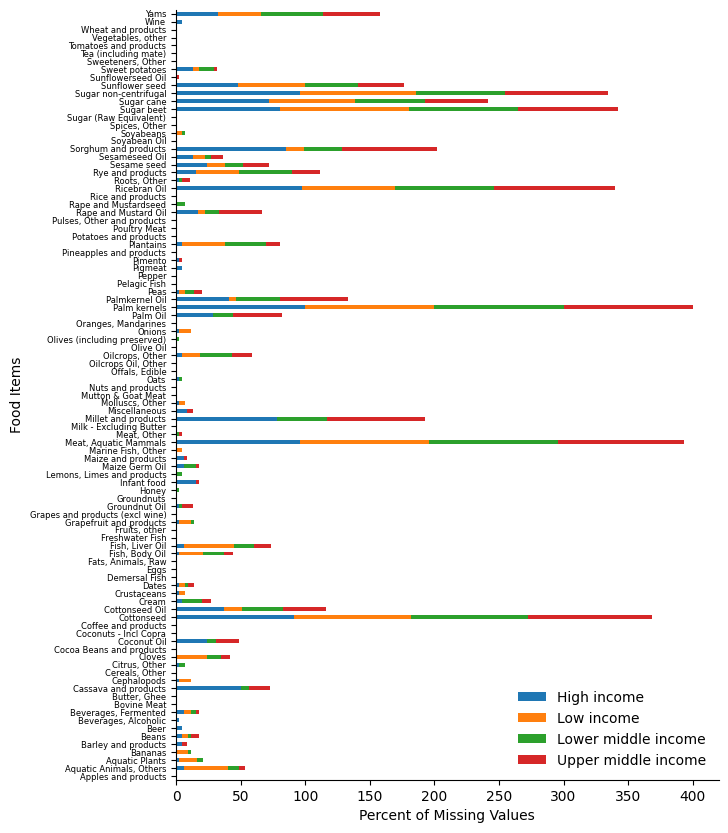

In [160]:
# 7. Checking the Type and Extent of Missing Data

## Splitting the data such that income groups and other fields are separate:
income_groups = size_and_dietary_intake[['Income group']]
# display(income_groups)


data = size_and_dietary_intake.iloc[:, 2:]
# display(data)


dietary_intake_nullity = data.isnull()
# display(dietary_intake_nullity)


## Merging it so that one can group missing values by income groups
dietary_nullity_income_grouped = pd.merge(income_groups,
                                          dietary_intake_nullity,
                                          left_index=True,
                                          right_index=True).groupby('Income group')

percentage_of_nullity = (dietary_nullity_income_grouped.sum() / dietary_nullity_income_grouped.count()) * 100


# display(percentage_of_nullity)



# Visualizing Nullity
percentage_of_nullity_dietary_intake_transposed = percentage_of_nullity.T

ax = percentage_of_nullity_dietary_intake_transposed.plot(kind='barh',
                                                          stacked=True)

ax.figure.set_size_inches(7, 10)
ax.set(xlabel='Percent of Missing Values',
       ylabel='Food Items')
ax.legend(loc='lower right', frameon=False)
#ax.invert_yaxis()
for spine in ['top', 'right'] :
    ax.spines[spine].set_visible(False)
# ax.set_title('Percentage of Missing Values For Each Food Item in Each Income Group', fontdict={'fontsize' : 10})
ax.tick_params(axis='y', which= 'major', labelsize=6)

#plt.set_size_inches(9, 7)
#plt.savefig('Percent_of_Nullity_1st_indicator.png')
plt.show()

In [11]:
# 9. Cleaning the dataset
# 9.1. Replacing 'NaN's with 0's
size_and_dietary_intake_imputed = size_and_dietary_intake.fillna(0) 	#print(the_sheet.head())


# 9.2. Grouping the foods into 7 groups : "Cereals", "Roots & Tubers", "Meat, Milk and Products, Eggs", "Vegetables", "Fruits and Plantains", "Seeds, Nuts and Oils", "Starch and Sugars"

daily_intake_aggregated = {
    'Country' : size_and_dietary_intake_imputed.index,
    'Income group' : size_and_dietary_intake_imputed['Income group'].values,
    #'Region' : size_and_dietary_intake_imputed['Region'].values,
    'Cereals' : 0,
    'Roots & Tubers' : 0,
    'Meat, Milk and products & Eggs' : 0,
    'Seeds, Nuts, and Oils' : 0,
    'Starchs & Sugars' : 0
}



daily_intake_aggregated['Cereals'] = \
    	size_and_dietary_intake_imputed['Barley and products']+ \
    	size_and_dietary_intake_imputed['Cereals, Other']+ \
        size_and_dietary_intake_imputed['Maize and products']+ \
        size_and_dietary_intake_imputed['Millet and products']+ \
        size_and_dietary_intake_imputed['Oats']+ \
        size_and_dietary_intake_imputed['Rice and products']+ \
        size_and_dietary_intake_imputed['Rye and products']+ \
        size_and_dietary_intake_imputed['Sorghum and products'] + \
        size_and_dietary_intake_imputed['Wheat and products']
        
daily_intake_aggregated['Roots & Tubers'] = \
    	size_and_dietary_intake_imputed['Cassava and products']+ \
        size_and_dietary_intake_imputed['Potatoes and products']+ \
        size_and_dietary_intake_imputed['Roots, Other']+ \
        size_and_dietary_intake_imputed['Sweet potatoes']+ \
    	size_and_dietary_intake_imputed['Yams'] + \
    	size_and_dietary_intake_imputed['Sugar cane'] + \
        size_and_dietary_intake_imputed['Sugar beet']

daily_intake_aggregated["Dairy & Egg Products"] = \
    size_and_dietary_intake_imputed['Butter, Ghee']+ \
    size_and_dietary_intake_imputed['Cream']+ \
    size_and_dietary_intake_imputed['Eggs'] + \
    size_and_dietary_intake_imputed['Milk - Excluding Butter']

daily_intake_aggregated["Finfish / Shellfish Products"] = \
	size_and_dietary_intake_imputed['Cephalopods']+ \
	size_and_dietary_intake_imputed['Crustaceans']+ \
    size_and_dietary_intake_imputed['Demersal Fish'] + \
    size_and_dietary_intake_imputed['Fish, Body Oil'] + \
    size_and_dietary_intake_imputed['Fish, Liver Oil'] + \
    size_and_dietary_intake_imputed['Freshwater Fish'] + \
    size_and_dietary_intake_imputed['Marine Fish, Other'] + \
    size_and_dietary_intake_imputed['Molluscs, Other']+ \
    size_and_dietary_intake_imputed['Pelagic Fish'] + \
    size_and_dietary_intake_imputed['Aquatic Animals, Others']


daily_intake_aggregated["Poultry"] = \
    size_and_dietary_intake_imputed['Poultry Meat']

daily_intake_aggregated["Pork"] = \
    size_and_dietary_intake_imputed['Pigmeat']


daily_intake_aggregated['Beef Products'] = \
    	size_and_dietary_intake_imputed['Bovine Meat']+ \
        size_and_dietary_intake_imputed['Offals, Edible'] + \
        size_and_dietary_intake_imputed['Fats, Animals, Raw'] + \
        size_and_dietary_intake_imputed['Meat, Other'] + \
        size_and_dietary_intake_imputed['Meat, Aquatic Mammals'] + \
    	size_and_dietary_intake_imputed['Mutton & Goat Meat']
        

daily_intake_aggregated["Spices & Herbs"] = \
    size_and_dietary_intake_imputed['Spices, Other'] + \
    size_and_dietary_intake_imputed['Tea (including mate)'] + \
    size_and_dietary_intake_imputed['Cloves']

daily_intake_aggregated["Legumes & Products"] = \
    size_and_dietary_intake_imputed['Pulses, Other and products']+ \
    size_and_dietary_intake_imputed['Beans']+ \
    size_and_dietary_intake_imputed['Soyabeans']+ \
    size_and_dietary_intake_imputed['Peas']

daily_intake_aggregated['Vegetables'] = \
    size_and_dietary_intake_imputed['Pimento'] + \
    size_and_dietary_intake_imputed['Pepper'] + \
	size_and_dietary_intake_imputed['Onions']+ \
    size_and_dietary_intake_imputed['Vegetables, other'] + \
	size_and_dietary_intake_imputed['Tomatoes and products'] + \
    size_and_dietary_intake_imputed['Aquatic Plants']
    
daily_intake_aggregated['Fruits & Plantains'] = \
    	size_and_dietary_intake_imputed['Bananas']+ \
    	size_and_dietary_intake_imputed['Coconuts - Incl Copra']+ \
    	size_and_dietary_intake_imputed['Dates']+ \
    	size_and_dietary_intake_imputed['Fruits, other']+ \
    	size_and_dietary_intake_imputed['Grapefruit and products'] + \
    	size_and_dietary_intake_imputed['Grapes and products (excl wine)'] + \
    	size_and_dietary_intake_imputed['Lemons, Limes and products'] + \
    	size_and_dietary_intake_imputed['Oranges, Mandarines'] + \
    	size_and_dietary_intake_imputed['Pineapples and products'] + \
    	size_and_dietary_intake_imputed['Plantains'] + \
    	size_and_dietary_intake_imputed['Apples and products'] + \
        size_and_dietary_intake_imputed['Citrus, Other']
    
daily_intake_aggregated['Seeds, Nuts, and Oils'] = \
    	size_and_dietary_intake_imputed['Cocoa Beans and products'] + \
        size_and_dietary_intake_imputed['Maize Germ Oil'] + \
        size_and_dietary_intake_imputed['Nuts and products'] + \
    	size_and_dietary_intake_imputed['Coconut Oil'] + \
        size_and_dietary_intake_imputed['Coconuts - Incl Copra'] + \
    	size_and_dietary_intake_imputed['Coffee and products'] + \
    	size_and_dietary_intake_imputed['Cottonseed Oil'] + \
    	size_and_dietary_intake_imputed['Cottonseed'] + \
        size_and_dietary_intake_imputed['Ricebran Oil'] + \
    	size_and_dietary_intake_imputed['Groundnut Oil'] + \
        size_and_dietary_intake_imputed['Oilcrops Oil, Other'] + \
    	size_and_dietary_intake_imputed['Groundnuts'] + \
        size_and_dietary_intake_imputed['Olive Oil'] + \
        size_and_dietary_intake_imputed['Olives (including preserved)'] + \
    	size_and_dietary_intake_imputed['Oilcrops, Other'] + \
    	size_and_dietary_intake_imputed['Palmkernel Oil'] + \
    	size_and_dietary_intake_imputed['Palm Oil'] + \
    	size_and_dietary_intake_imputed['Palm kernels'] + \
    	size_and_dietary_intake_imputed['Rape and Mustard Oil'] + \
    	size_and_dietary_intake_imputed['Rape and Mustardseed'] + \
    	size_and_dietary_intake_imputed['Sesame seed'] + \
    	size_and_dietary_intake_imputed['Sesameseed Oil'] + \
    	size_and_dietary_intake_imputed['Soyabean Oil'] + \
    	size_and_dietary_intake_imputed['Sunflower seed'] + \
    	size_and_dietary_intake_imputed['Sunflowerseed Oil']
    	#the_sheet_transposed['Nuts and products [2551]'] + \
    
daily_intake_aggregated['Starchs & Sugars'] = \
    	size_and_dietary_intake_imputed['Honey'] + \
    	size_and_dietary_intake_imputed['Sugar (Raw Equivalent)'] + \
    	size_and_dietary_intake_imputed['Sugar non-centrifugal'] + \
    	size_and_dietary_intake_imputed['Sweeteners, Other'] + \
    	size_and_dietary_intake_imputed['Beverages, Fermented']

daily_intake_aggregated['Infant food'] = \
        size_and_dietary_intake_imputed['Infant food']


daily_dietary_intake = pd.DataFrame(daily_intake_aggregated).set_index('Country')


# Removing the "Meat, Milk and products & Eggs column"
daily_dietary_intake = daily_dietary_intake.drop("Meat, Milk and products & Eggs", axis=1)


display(daily_dietary_intake.head())
# daily_dietary_intake.to_csv('Daily Dietary Energy Intake.csv', index=True)

daily_dietary_intake.info()

,Income group,Cereals,Roots & Tubers,"Seeds, Nuts, and Oils",Starchs & Sugars,Dairy & Egg Products,Finfish / Shellfish Products,Poultry,Pork,Beef Products,Spices & Herbs,Legumes & Products,Vegetables,Fruits & Plantains,Infant food
Country,,,,,,,,,,,,,,,
Afghanistan,Low income,1534.0,53.0,209.0,149.0,120.0,1.0,6.0,0.0,50.0,3.0,17.0,34.0,59.0,1.0
Angola,Lower middle income,761.0,733.0,321.0,159.0,14.0,24.0,33.0,77.0,39.0,0.0,77.0,15.0,103.0,1.0
Albania,Upper middle income,1066.0,89.0,331.0,204.0,716.0,15.0,62.0,59.0,164.0,0.0,50.0,208.0,289.0,1.0
United Arab Emirates,High income,1079.0,39.0,811.0,346.0,219.0,42.0,111.0,0.0,115.0,10.0,160.0,55.0,109.0,5.0
Argentina,Upper middle income,1049.0,84.0,404.0,437.0,297.0,11.0,194.0,112.0,408.0,27.0,55.0,54.0,81.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Income group                  156 non-null    object 
 1   Cereals                       156 non-null    float64
 2   Roots & Tubers                156 non-null    float64
 3   Seeds, Nuts, and Oils         156 non-null    float64
 4   Starchs & Sugars              156 non-null    float64
 5   Dairy & Egg Products          156 non-null    float64
 6   Finfish / Shellfish Products  156 non-null    float64
 7   Poultry                       156 non-null    float64
 8   Pork                          156 non-null    float64
 9   Beef Products                 156 non-null    float64
 10  Spices & Herbs                156 non-null    float64
 11  Legumes & Products            156 non-null    float64
 12  Vegetables                    156 non-null    float64


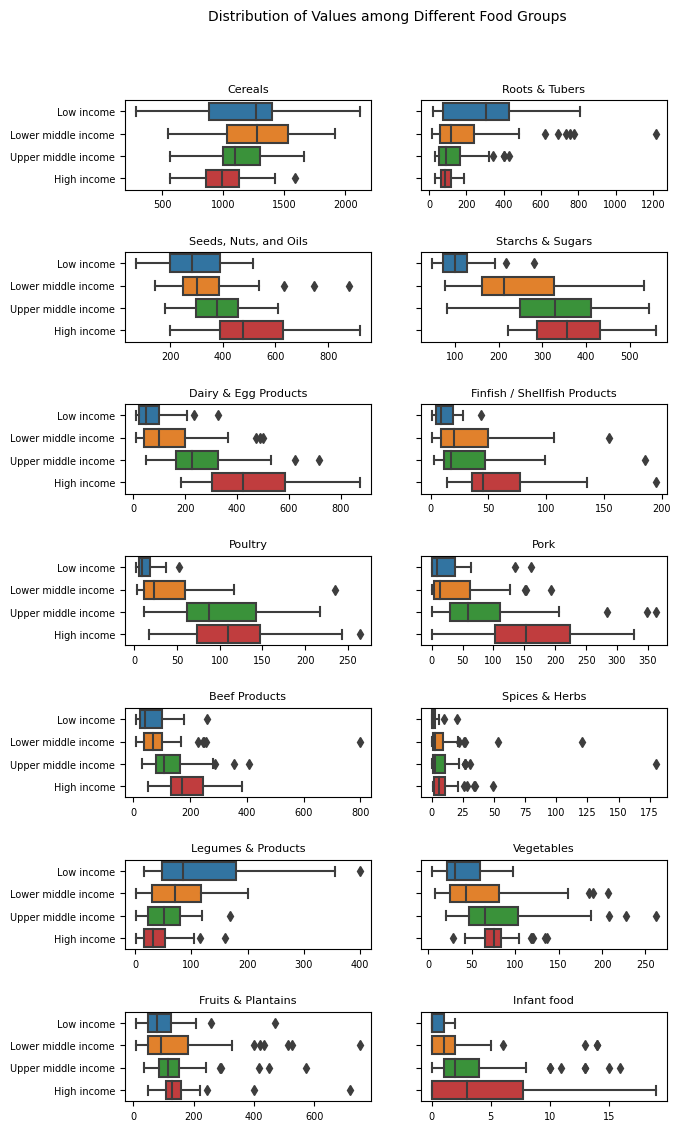

In [12]:
## 9.3. Checking Extreme Values

def income_group_separator(df, col, cat) :

    """Separates a respective income group's data"""
    
    new_df = df[df[col] == cat]
    
    return new_df

low_inc_values = income_group_separator(daily_dietary_intake, 'Income group', 'Low income')

lower_middle_values = income_group_separator(daily_dietary_intake,'Income group', 'Lower middle income')

upper_middle_values = income_group_separator(daily_dietary_intake,'Income group', 'Upper middle income')

high_inc_values = income_group_separator(daily_dietary_intake, 'Income group', 'High income')

#display(high_inc_values.head())

fig, ((ax1, ax2), 
      (ax3, ax4), 
      (ax5, ax6), 
      (ax7, ax8), 
      (ax9, ax10), 
      (ax11, ax12), 
      (ax13, ax14)) = plt.subplots(7, 2, sharey=True, sharex=False, figsize=(7, 13))

def distributions(df, x, y, ax) :
    
    """Plots Boxplots for income groups"""
    
    g = sns.boxplot(data=df,
                    ax= ax,
                    x=x,
                    palette='tab10',
                    y=y).set(xlabel='',
                             ylabel='',
                             title=x)
    
    ax.set_title(x, fontsize=8)
    
    ax.tick_params(axis='both', which='major', labelsize=7)
    
    return g


#display(daily_dietary_intake.groupby('Income group').count())

distributions(df=daily_dietary_intake, y='Income group', x='Cereals', ax=ax1)
distributions(df=daily_dietary_intake, y='Income group', x='Roots & Tubers', ax=ax2)
distributions(df=daily_dietary_intake, y='Income group', x='Seeds, Nuts, and Oils', ax=ax3)
distributions(df=daily_dietary_intake, y='Income group', x='Starchs & Sugars', ax=ax4)
distributions(df=daily_dietary_intake, y='Income group', x='Dairy & Egg Products', ax=ax5)
distributions(df=daily_dietary_intake, y='Income group', x='Finfish / Shellfish Products', ax=ax6)
distributions(df=daily_dietary_intake, y='Income group', x='Poultry', ax=ax7)
distributions(df=daily_dietary_intake, y='Income group', x='Pork', ax=ax8)
distributions(df=daily_dietary_intake, y='Income group', x='Beef Products', ax=ax9)
distributions(df=daily_dietary_intake, y='Income group', x='Spices & Herbs', ax=ax10)
distributions(df=daily_dietary_intake, y='Income group', x='Legumes & Products', ax=ax11)
distributions(df=daily_dietary_intake, y='Income group', x='Vegetables', ax=ax12)
distributions(df=daily_dietary_intake, y='Income group', x='Fruits & Plantains', ax=ax13)
distributions(df=daily_dietary_intake, y='Income group', x='Infant food', ax=ax14)


plt.suptitle('Distribution of Values among Different Food Groups', y= 0.95, fontsize=10)
plt.subplots_adjust(hspace= 0.7)
#plt.savefig('Distribution_of_Daily_Kcal_Intakes.png')

#daily_dietary_intake.groupby('Income group').count().to_csv('Count_of_countries_Median_dietary_Intake.csv')

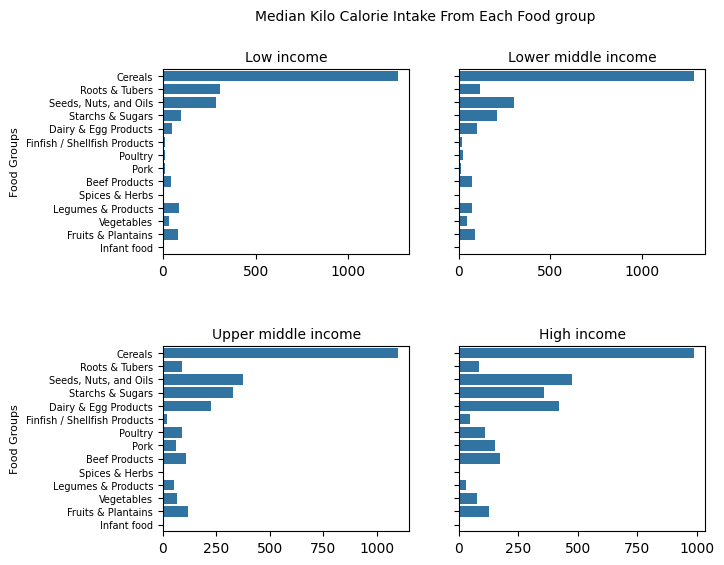

In [13]:
# 10. Preparing to extract dietary values from foods that are not staples.

## 10.1. Aggregating the data according to income groups

daily_intake_economized = daily_dietary_intake.groupby('Income group')

median_kilo_calories_by_income_group = daily_intake_economized.median()



## 10.2. Visualizing median kilo calories from each income group.

## Transposing so that one can plot
median_kilo_cal_transposed = median_kilo_calories_by_income_group.T

#display(daily_dietary_intake.head(10))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=True)
fig.set_size_inches(7, 6)

palette= ['#1f77b4']


def bar_plotter(df, x, y, ax, xlabel=None, ylabel=None) :
    
    """Creates bar plots for Income groups"""
    
    g = sns.barplot(x=x,
                    y=y,
                    data= df,
                    ax= ax,
                    palette=palette).set(xlabel='')


    ax.tick_params(axis= 'y', which='major', labelsize=7)
    ax.set_ylabel(ylabel, fontdict={"fontsize" : 8})
    ax.set_xlabel(xlabel, fontdict={'fontsize' : 8})
    ax.set_title(label=x, fontsize=10)
    plt.subplots_adjust(hspace=0.5)



df = median_kilo_cal_transposed

y = median_kilo_cal_transposed.index

yl = 'Food Groups'


bar_plotter(df, x='Low income', y=y, ax=ax1, ylabel=yl)

bar_plotter(df, x='Lower middle income', ax=ax2, y=y)

bar_plotter(df, x='Upper middle income', ax=ax3, y=y, ylabel=yl)

bar_plotter(df, x='High income', y=y, ax=ax4)


plt.suptitle('Median Kilo Calorie Intake From Each Food group', fontsize=10)
plt.savefig('Median Daily_Intake_Kcal.png')
plt.show()

In [308]:
median_kcal_high_income = median_kilo_cal_transposed[['High income']].sort_values('High income', ascending=False)

median_kcal_low_income = median_kilo_cal_transposed[['Low income']].sort_values('Low income' , ascending=False)

median_kcal_lower_middle_income = median_kilo_cal_transposed[['Lower middle income']].sort_values('Lower middle income', ascending=False)

median_kcal_upper_middle_income = median_kilo_cal_transposed[['Upper middle income']].sort_values('Upper middle income', ascending=False)


def percentage_cal(df) :
    
    """Calculates Percentage For Each Food Group"""

    df.loc['Total'] = df.iloc[:, 0].sum()

    numerator = df.iloc[:, 0].values

    denominator = df.loc['Total'].values

    df['Percent'] = np.round(((numerator / denominator) * 100), 1)
    
    return df




food_group_kcal_percent_high_income = percentage_cal(median_kcal_high_income)

food_group_kcal_percent_low_income = percentage_cal(median_kcal_low_income)

food_group_kcal_percent_lower_middle = percentage_cal(median_kcal_lower_middle_income)

food_group_kcal_percent_upper_middle = percentage_cal(median_kcal_upper_middle_income)


#display(food_group_kcal_percent_high_income)
#display(food_group_kcal_percent_low_income)
#display(food_group_kcal_percent_lower_middle)
#display(food_group_kcal_percent_upper_middle)



# 11. Extracting median daily calory intake from staple & non-staple food from each income group

daily_calories_non_staples_low_income = food_group_kcal_percent_low_income[food_group_kcal_percent_low_income['Percent'] < 12.5]

staples_low_income = food_group_kcal_percent_low_income[food_group_kcal_percent_low_income['Percent'] >= 12.5]


daily_calories_non_staples_high_income = food_group_kcal_percent_high_income[food_group_kcal_percent_high_income['Percent'] < 12.5]

staples_high_income = food_group_kcal_percent_high_income[food_group_kcal_percent_high_income['Percent'] >= 12.5]


daily_calories_non_staples_lower_middle = food_group_kcal_percent_lower_middle[food_group_kcal_percent_lower_middle['Percent'] < 12.5]

staples_lower_middle = food_group_kcal_percent_lower_middle[food_group_kcal_percent_lower_middle['Percent'] >= 12.5]


daily_calories_non_staples_upper_middle = food_group_kcal_percent_upper_middle[food_group_kcal_percent_upper_middle['Percent'] < 12.5]

staples_upper_middle = food_group_kcal_percent_upper_middle[food_group_kcal_percent_upper_middle['Percent'] >= 12.5]



display(daily_calories_non_staples_low_income.T)
display(staples_low_income.T)

display(daily_calories_non_staples_lower_middle.T)
display(staples_lower_middle.T)

display(daily_calories_non_staples_upper_middle.T)
display(staples_upper_middle.T)

display(daily_calories_non_staples_high_income.T)
display(staples_high_income.T)


,Starchs & Sugars,Legumes & Products,Fruits & Plantains,Dairy & Egg Products,Beef Products,Vegetables,Finfish / Shellfish Products,Poultry,Pork,Spices & Herbs,Infant food
Income group,,,,,,,,,,,
Low income,99.0,85.0,80.0,47.0,41.0,31.0,9.0,9.0,9.0,1.0,0.0
Percent,4.4,3.7,3.5,2.1,1.8,1.4,0.4,0.4,0.4,0.0,0.0


,Cereals,Roots & Tubers,"Seeds, Nuts, and Oils",Total
Income group,,,,
Low income,1266.0,307.0,285.0,2269.0
Percent,55.8,13.5,12.6,100.0


,Starchs & Sugars,Roots & Tubers,Dairy & Egg Products,Fruits & Plantains,Beef Products,Legumes & Products,Vegetables,Poultry,Finfish / Shellfish Products,Pork,Spices & Herbs,Infant food
Income group,,,,,,,,,,,,
Lower middle income,211.0,116.5,100.0,91.0,71.0,71.0,43.0,23.5,20.0,13.5,2.5,1.0
Percent,9.0,5.0,4.3,3.9,3.0,3.0,1.8,1.0,0.9,0.6,0.1,0.0


,Cereals,"Seeds, Nuts, and Oils",Total
Income group,,,
Lower middle income,1281.5,301.0,2346.5
Percent,54.6,12.8,100.0


,Dairy & Egg Products,Fruits & Plantains,Beef Products,Roots & Tubers,Poultry,Vegetables,Pork,Legumes & Products,Finfish / Shellfish Products,Spices & Herbs,Infant food
Income group,,,,,,,,,,,
Upper middle income,225.0,116.0,107.0,89.0,88.0,65.0,59.0,51.0,18.0,3.0,2.0
Percent,8.6,4.4,4.1,3.4,3.3,2.5,2.2,1.9,0.7,0.1,0.1


,Cereals,"Seeds, Nuts, and Oils",Starchs & Sugars,Total
Income group,,,,
Upper middle income,1099.0,377.0,329.0,2628.0
Percent,41.8,14.3,12.5,100.0


,Starchs & Sugars,Beef Products,Pork,Fruits & Plantains,Poultry,Roots & Tubers,Vegetables,Finfish / Shellfish Products,Legumes & Products,Spices & Herbs,Infant food
Income group,,,,,,,,,,,
High income,357.0,172.5,152.0,127.5,109.5,86.5,76.0,45.0,32.0,6.0,3.0
Percent,11.7,5.7,5.0,4.2,3.6,2.8,2.5,1.5,1.0,0.2,0.1


,Cereals,"Seeds, Nuts, and Oils",Dairy & Egg Products,Total
Income group,,,,
High income,988.0,476.0,421.0,3052.0
Percent,32.4,15.6,13.8,100.0


In [15]:
intake_percent_table_index = [
    ['Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Low Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Lower Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'Upper Middle Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income',
     'High Income'],
    ['Cereals',
     'Cereals', 'Cereals', 'Cereals', 'Roots & Tubers', 'Roots & Tubers', 'Roots & Tubers', 'Roots & Tubers', "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", 'Cereals', 'Cereals', 'Cereals', 'Cereals', 'Cereals', 'Cereals', "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", 'Cereals', 'Cereals', 'Cereals', 'Cereals', 'Cereals', "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", "Seeds, Nuts, and Oils", 'Starchs & Sugars', 'Starchs & Sugars', 'Starchs & Sugars', 'Cereals', 'Cereals', 'Cereals', 'Cereals', 'Cereals', 'Seeds, Nuts, and Oils', 'Seeds, Nuts, and Oils','Seeds, Nuts, and Oils', "Dairy & Egg Products", "Dairy & Egg Products", "Dairy & Egg Products"],
    ['55.8', '55.8', '55.8', '55.8', '13.5', '13.5', '13.5', '13.5', '12.6', '12.6', '12.6', '54.6', '54.6', '54.6', '54.6', '54.6', '54.6', '12.8', '12.8', '12.8', '12.8', '12.8', '12.8', '41.8', '41.8', '41.8', '41.8', '41.8', "14.3", "14.3", "14.3", "12.5", "12.5", "12.5", "32.4", "32.4", "32.4", "32.4", "32.4", "15.6", "15.6", "15.6", "13.8", "13.8", "13.8"],
    ['Starchs & Sugars', 'Legumes & Products', 'Fruits & Plantains', 'Dairy & Egg Products', 'Beef Products', 'Vegetables', 'Finfish / Shellfish Products', "Poultry", "Pork", "Spices & Herbs", "Infant Foods", 'Starchs & Sugars', 'Roots & Tubers', 'Dairy & Egg Products', 'Fruits & Plantains', 'Beef Products', "Legumes & Products", 'Vegetables', 'Poultry', 'Finfish / Shellfish Products', 'Pork', 'Spices & Herbs', 'Infant Food', 'Dairy & Egg Products', 'Fruits & Plantains', 'Beef Products', 'Roots & Tubers', 'Poultry', "Vegetables", "Pork", "Legumes & Products", "Finfish / Shellfish Products", "Spices & Herbs", "Infant food", "Starchs & Sugars", "Beef Products", "Pork", "Fruits & Plantains", "Poultry", "Roots & Tubers", "Vegetables", "Finfish / Shellfish Products", "Legumes & Products", "Spices & Herbs", "Infant Food"],
]


intake_percent_table_column = ["4.4", "3.7", '3.5', '2.1', '1.8', '1.4', '0.4', '0.4', '0.4', '0.0', '0.0', '9.0', '5.0', '4.3', '3.9', '3.0', '3.0', '1.8', '1.0', '0.9', '0.6', '0.1', '0.0', '8.6', '4.4', '4.1', '3.4', '3.3', "2.5", "2.2", "1.9", "0.7", "0.1", "0.1", "11.7", "5.7", "5.0", "4.2", "3.6", "2.8", "2.5", "1.5", "1.0", "0.2", "0.1"]

# display(len(intake_percent_table_column))


In [16]:

intake_percent_table = pd.DataFrame(intake_percent_table_column,
                                    index=intake_percent_table_index,
                                    columns=['Percent of Median Calorie Intake'])

intake_percent_table.index = intake_percent_table.index.rename(['Income group', 'Staple Foods', 'Percent of Median Daily Calorie Intake', 'Non-Staple Foods'])

display(intake_percent_table.style)

# intake_percent_table.to_csv('Daily_Median_Percent_Intakes.csv', index=True)

In [17]:
# Exploratory Data Analysis: Which countries consume more calories from non-staple foods?

# Converting the last column into numerical values

intake_percent_table["Percent of Median Calorie Intake"] = intake_percent_table["Percent of Median Calorie Intake"].astype("float")

assert intake_percent_table["Percent of Median Calorie Intake"].dtype == "float"

intake_percent_table.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45 entries, ('Low Income', 'Cereals', '55.8', 'Starchs & Sugars') to ('High Income', 'Dairy & Egg Products', '13.8', 'Infant Food')
Data columns (total 1 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Percent of Median Calorie Intake  45 non-null     float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [18]:
# Adding the median values from each group

calories_from_non_staples = pd.DataFrame([daily_calories_non_staples_low_income.T.iloc[1].sum(),
                                          daily_calories_non_staples_lower_middle.T.iloc[1].sum(),
                                          daily_calories_non_staples_upper_middle.T.iloc[1].sum(),
                                          daily_calories_non_staples_high_income.T.iloc[1].sum()],
                                          index=["Low income", 
                                                 "Lower middle income",
                                                 "Upper middle income",
                                                 "High income"],
                                          columns= ["Percent of kcal from non-staple foods"])

calories_from_non_staples

,Percent of kcal from non-staple foods
Low income,18.1
Lower middle income,32.6
Upper middle income,31.3
High income,38.3


In [19]:
# Number of countries from each group in this indicator:

daily_intake_economized.count()

,Cereals,Roots & Tubers,"Seeds, Nuts, and Oils",Starchs & Sugars,Dairy & Egg Products,Finfish / Shellfish Products,Poultry,Pork,Beef Products,Spices & Herbs,Legumes & Products,Vegetables,Fruits & Plantains,Infant food
Income group,,,,,,,,,,,,,,
High income,46,46,46,46,46,46,46,46,46,46,46,46,46,46
Low income,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Lower middle income,44,44,44,44,44,44,44,44,44,44,44,44,44,44
Upper middle income,45,45,45,45,45,45,45,45,45,45,45,45,45,45


##### Shannon Diversity

This indicator measures the diversity of nutrients in a food system by measuring quantity in weight of various food items available in a food system. Data for the annual per capita quantity supply of food items in countries globally, in-terms of weight, is readly available at FAO <cite id="v6csd">({\em FAOSTAT}, n.d.)</cite>. Data for similar food items as the ones used in the first indicator was obtained from FAO's food balance sheets. A preliminary examination of the data showed considerable missing values in some food items, and here, like in the previous indicator, the type and extent of missing data, together with previous knowledge on the domain of subject, determined the method of handling missing data. The type of missing data was both MAR (as some food items such as *millet and products*, have a high percentage of missingness in only three income groups (High income, Low middle income and Upper middle income), suggesting that there is another factor influencing the missingness of this variable (hence MAR)), and MNAR (as some, such as *non-centrifugal sugars* have a high percentage of missingness in all four income groups, suggesting there being some reporting problems that caused the data for both 4 income groups to be missing). It was decided to remove all food items with more than 40% of missing data in any of the 4 income groups as practical recommendation from <cite id="evyja">({\em What Should Be the Allowed Percentage of Missing Values?}, 2015)</cite> and <cite id="e6lck">(Hair et al., 2018)</cite> suggest. Imputation was done using the MICE and KNN multiple-imputation methods, and the results of the R statistic were compared to each other. The figure below shows the percentage of missing data from each food group (figure...) and the KNN, MICE R-statistic comparison. Imputation by using MICE proved to be more robust (with the adjusted R-square of 0.89), and thus the dataset imputed by using it was the one used for the next procedures of data preparation. The data was then aggregated into seven food groups, as the one used in the first indicator, and then it was ready for the next stage of the analysis.

In [20]:
# 1. Reading-in the dataset from FAO

food_supply = pd.read_csv('Food Quantity Data.csv',
                          sep= ',',
                          names= ['Country', 'Item', 'Value'])

#display(food_supply.head(30))

copy_food_supply = food_supply.copy(deep= True).drop(0)

display(copy_food_supply.head(10))

,Country,Item,Value
1,Afghanistan,Wheat and products,158.95
2,Afghanistan,Rice and products,17.21
3,Afghanistan,Barley and products,0.07
4,Afghanistan,Maize and products,3.53
5,Afghanistan,Rye and products,0
6,Afghanistan,Oats,0
7,Afghanistan,Millet and products,0.16
8,Afghanistan,"Cereals, Other",0
9,Afghanistan,Cassava and products,0.01
10,Afghanistan,Potatoes and products,26.49


In [21]:
# 2. Transposing the Data so that each country is represented as a one row:
transposed_copy_of_food_supply = copy_food_supply.pivot(
    index= 'Country',
    columns= 'Item',
    values= 'Value'
)

display(transposed_copy_of_food_supply.head())
#display(transposed_copy_of_food_supply.info())

Item,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Bovine Meat,"Butter, Ghee",Cassava and products,Cephalopods,...,Sugar non-centrifugal,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Yams
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.95,NaN,NaN,3.11,0.07,0,2.73,0.97,0.01,NaN,...,NaN,NaN,1.27,0,0.54,2,0.89,55.39,158.95,NaN
Albania,32.66,0,0,8.26,0.2,5.03,13.2,1.52,0,0.72,...,NaN,NaN,4.72,0.01,24.22,0.15,77.88,217.39,124.68,NaN
Algeria,12.38,0,0,4.32,15.01,1.54,4.85,0.4,0,0.03,...,NaN,NaN,1.26,0,2.81,0.36,34.52,137.39,181.92,NaN
Angola,0.38,0,0,37.32,0,7.24,4.17,0.04,226.1,0,...,NaN,NaN,0.27,39.53,9.23,0.03,2.12,20.49,27.17,NaN
Antigua and Barbuda,5.47,NaN,0,17.87,0,1.03,6.74,1.26,0.78,0.25,...,NaN,0.04,0.09,2.33,28.34,0.73,5.82,44.71,68.7,1.35


In [22]:
# 3. Changing the data type. Data in all columns was as objects, not numbers.
transposed_copy_copy = transposed_copy_of_food_supply.copy(deep= True)#.fillna(0)

transposed_copy_cleaned = transposed_copy_copy.loc[:,:].astype('float')

#assert transposed_copy_cleaned.loc[:,:].dtype == 'float'

display(transposed_copy_cleaned.head())

Item,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Bovine Meat,"Butter, Ghee",Cassava and products,Cephalopods,...,Sugar non-centrifugal,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Yams
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.95,NaN,NaN,3.11,0.07,0.00,2.73,0.97,0.01,NaN,...,NaN,NaN,1.27,0.00,0.54,2.00,0.89,55.39,158.95,NaN
Albania,32.66,0.0,0.0,8.26,0.20,5.03,13.20,1.52,0.00,0.72,...,NaN,NaN,4.72,0.01,24.22,0.15,77.88,217.39,124.68,NaN
Algeria,12.38,0.0,0.0,4.32,15.01,1.54,4.85,0.40,0.00,0.03,...,NaN,NaN,1.26,0.00,2.81,0.36,34.52,137.39,181.92,NaN
Angola,0.38,0.0,0.0,37.32,0.00,7.24,4.17,0.04,226.10,0.00,...,NaN,NaN,0.27,39.53,9.23,0.03,2.12,20.49,27.17,NaN
Antigua and Barbuda,5.47,NaN,0.0,17.87,0.00,1.03,6.74,1.26,0.78,0.25,...,NaN,0.04,0.09,2.33,28.34,0.73,5.82,44.71,68.70,1.35


In [23]:
# 4. Attaching countries' regions and sizes of economy
transposed_copy_with_size_and_region = pd.merge(size_of_economy,
                                                transposed_copy_cleaned,
                                                left_index=True,
                                                right_index=True
                                               )

display(transposed_copy_with_size_and_region.head())

,Income group,Region,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Bovine Meat,"Butter, Ghee",...,Sugar non-centrifugal,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Yams
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Low income,South Asia,2.95,NaN,NaN,3.11,0.07,0.00,2.73,0.97,...,NaN,NaN,1.27,0.00,0.54,2.00,0.89,55.39,158.95,NaN
Angola,Lower middle income,Sub-Saharan Africa,0.38,0.0,0.0,37.32,0.00,7.24,4.17,0.04,...,NaN,NaN,0.27,39.53,9.23,0.03,2.12,20.49,27.17,NaN
Albania,Upper middle income,Europe & Central Asia,32.66,0.0,0.0,8.26,0.20,5.03,13.20,1.52,...,NaN,NaN,4.72,0.01,24.22,0.15,77.88,217.39,124.68,NaN
United Arab Emirates,High income,Middle East & North Africa,6.75,0.0,0.0,8.55,NaN,2.30,6.59,1.29,...,NaN,0.26,0.80,0.46,1.91,0.12,5.23,45.76,91.81,0.3
Argentina,Upper middle income,Latin America & Caribbean,5.39,0.0,0.0,12.66,NaN,2.11,47.98,0.48,...,NaN,NaN,11.17,2.56,8.34,24.14,22.87,37.86,117.84,NaN


In [24]:
# 5. Dealing with Missing Data: Determining the type.

## 5.1. Checking to see if there is any relationship between income group and missing data on a specific food item:

transposed_copy_nullity = transposed_copy_cleaned.isnull()

# display(transposed_copy_nullity)

transposed_copy_nullity_with_regions = pd.merge(size_of_economy,
                                                transposed_copy_nullity,
                                                left_index=True,
                                                right_index=True
                                               )
#display(transposed_copy_nullity_with_regions.head())

country_count_each_inc_group = pd.DataFrame(transposed_copy_with_size_and_region['Income group'].value_counts())

country_count_each_inc_group.columns = ['Total Count']

display(country_count_each_inc_group)

,Total Count
Income group,
High income,46
Upper middle income,45
Lower middle income,44
Low income,21


In [25]:
## 5.2. Percentage of missing values for each food group in each income group
nullity_by_income_group = transposed_copy_nullity_with_regions.groupby('Income group').sum().iloc[:, 1:]

count_of_countries = transposed_copy_nullity_with_regions.groupby('Income group').count().iloc[:, 1:]

percentage_of_nullity_of_food_groups = nullity_by_income_group.div(count_of_countries) * 100

display(percentage_of_nullity_of_food_groups)


,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Bovine Meat,"Butter, Ghee",Cassava and products,Cephalopods,...,Sugar non-centrifugal,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Yams
Income group,,,,,,,,,,,,,,,,,,,,,
High income,0.0,6.521739,2.173913,0.000000,4.347826,4.347826,0.0,0.0,50.000000,2.173913,...,95.652174,47.826087,0.000000,13.043478,0.0,0.0,0.0,0.0,0.0,32.608696
Low income,0.0,33.333333,14.285714,4.761905,0.000000,0.000000,0.0,0.0,0.000000,9.523810,...,90.476190,52.380952,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,33.333333
Lower middle income,0.0,9.090909,4.545455,2.272727,0.000000,2.272727,0.0,0.0,6.818182,0.000000,...,68.181818,40.909091,0.000000,9.090909,0.0,0.0,0.0,0.0,0.0,50.000000
Upper middle income,0.0,4.444444,0.000000,0.000000,4.444444,6.666667,0.0,0.0,15.555556,0.000000,...,80.000000,35.555556,2.222222,2.222222,0.0,0.0,0.0,0.0,0.0,44.444444


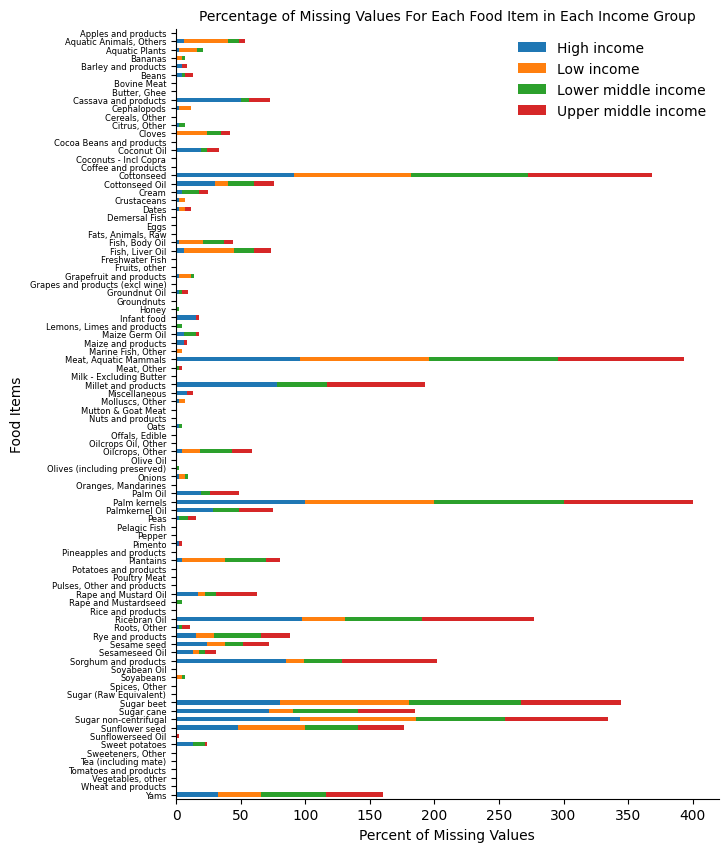

In [156]:
percentage_of_nullity_of_food_groups_pivoted = percentage_of_nullity_of_food_groups.T

#display(percentage_of_nullity_of_food_groups_pivoted)



## 5.3. Visualizing Missingness

#fig = plt.figure()
#fig.set_size_inches(10, 7)

ax = percentage_of_nullity_of_food_groups_pivoted.plot(kind= 'barh',
                                  stacked=True)

ax.figure.set_size_inches(7, 10)
ax.set(xlabel='Percent of Missing Values',
       ylabel='Food Items')
ax.legend(loc='upper right', frameon=False)
for spine in ['top', 'right'] :
    ax.spines[spine].set_visible(False)
ax.set_title('Percentage of Missing Values For Each Food Item in Each Income Group', fontdict={'fontsize' :10})
ax.tick_params(axis='y', which= 'major', labelsize=6)
ax.invert_yaxis()


# plt.savefig("missing_values_shannon.png")

In [27]:
## 5.4. Encoding the categorical values of Region and Size of Economy:  

### 5.4.1. Making sure there aren't any missing values

regions_nullity = transposed_copy_with_size_and_region['Region'].isnull()

size_of_economy_nullity = transposed_copy_with_size_and_region['Income group'].isnull()

print("Region nullity: {}".format(regions_nullity.sum()))

print("Nullity in Size of Economy: {}".format(size_of_economy_nullity.sum()))


Region nullity: 0
Nullity in Size of Economy: 0


In [28]:
## There was one un-classified country in-terms of size-of-economy: Venezuela. Up to the time you're reading this, it is no longer in the dataset. So run the block as it is.

size_of_economy_missing_val = size_of_economy_nullity[size_of_economy_nullity == True]

display(size_of_economy_missing_val)


# Removing Venezuela
#adjusted_transposed_copy = transposed_copy_with_size_and_region.drop('Venezuela, RB', axis=0)

adjusted_transposed_copy = transposed_copy_with_size_and_region

size_of_economy_nullity_updated = adjusted_transposed_copy['Income group'].isnull().sum()

#print("Updated Number of Nullity at Size of Economy / Income group: {}".format(size_of_economy_nullity_updated))


Series([], Name: Income group, dtype: bool)

In [29]:
# Encoding
encoder = OrdinalEncoder()

regions = adjusted_transposed_copy['Region']

income_groups = adjusted_transposed_copy['Income group']

display(pd.DataFrame(regions.unique()))
display(pd.DataFrame(income_groups.unique()))


,0
0,South Asia
1,Sub-Saharan Africa
2,Europe & Central Asia
3,Middle East & North Africa
4,Latin America & Caribbean
5,East Asia & Pacific
6,North America


,0
0,Low income
1,Lower middle income
2,Upper middle income
3,High income


In [30]:
reshaped_regions = regions.values.reshape(-1, 1)

reshaped_income_groups = income_groups.values.reshape(-1, 1)

#display(reshaped_regions)

encoded_regions = encoder.fit_transform(reshaped_regions)

encoded_income_groups = encoder.fit_transform(reshaped_income_groups)
adjusted_transposed_copy_for_encoding = adjusted_transposed_copy.copy(deep=True)

adjusted_transposed_copy_for_encoding[adjusted_transposed_copy_for_encoding.columns[1]] = np.squeeze(encoded_regions)
#adjusted_transposed_copy_for_encoding.loc[:, 'Region'] = np.squeeze(encoded_regions) ---> A clearer code, but results into a FutureWarning Error

adjusted_transposed_copy_for_encoding[adjusted_transposed_copy_for_encoding.columns[0]] = np.squeeze(encoded_income_groups)
#adjusted_transposed_copy_for_encoding.loc[:, 'Income group'] = np.squeeze(encoded_income_groups)

display(adjusted_transposed_copy_for_encoding.head(10))


,Income group,Region,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Bovine Meat,"Butter, Ghee",...,Sugar non-centrifugal,Sunflower seed,Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products,Yams
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,5.0,2.95,NaN,NaN,3.11,0.07,0.00,2.73,0.97,...,NaN,NaN,1.27,0.00,0.54,2.00,0.89,55.39,158.95,NaN
Angola,2.0,6.0,0.38,0.00,0.0,37.32,0.00,7.24,4.17,0.04,...,NaN,NaN,0.27,39.53,9.23,0.03,2.12,20.49,27.17,NaN
Albania,3.0,1.0,32.66,0.00,0.0,8.26,0.20,5.03,13.20,1.52,...,NaN,NaN,4.72,0.01,24.22,0.15,77.88,217.39,124.68,NaN
United Arab Emirates,0.0,3.0,6.75,0.00,0.0,8.55,NaN,2.30,6.59,1.29,...,NaN,0.26,0.80,0.46,1.91,0.12,5.23,45.76,91.81,0.30
Argentina,3.0,2.0,5.39,0.00,0.0,12.66,NaN,2.11,47.98,0.48,...,NaN,NaN,11.17,2.56,8.34,24.14,22.87,37.86,117.84,NaN
Armenia,3.0,1.0,10.58,0.00,0.0,7.17,3.89,1.08,24.31,1.34,...,NaN,NaN,6.79,0.00,28.19,0.14,44.05,159.06,125.79,NaN
Antigua and Barbuda,0.0,2.0,5.47,NaN,0.0,17.87,0.00,1.03,6.74,1.26,...,NaN,0.04,0.09,2.33,28.34,0.73,5.82,44.71,68.70,1.35
Australia,0.0,0.0,11.03,0.07,0.0,11.07,0.00,1.79,26.12,3.81,...,NaN,NaN,0.58,2.52,7.43,0.53,15.82,61.31,76.62,0.02
Austria,0.0,1.0,20.77,0.02,0.0,13.60,0.91,0.16,16.08,5.20,...,NaN,0.95,5.79,0.24,3.58,0.34,13.83,75.84,76.33,0.00


In [31]:
## 5.5. Preparing Data For Imputation

excessive_missing_values = percentage_of_nullity_of_food_groups_pivoted[percentage_of_nullity_of_food_groups_pivoted.iloc[:, :] > 40]

display(excessive_missing_values.info())


<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, Apples and products to Yams
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High income          11 non-null     float64
 1   Low income           6 non-null      float64
 2   Lower middle income  9 non-null      float64
 3   Upper middle income  10 non-null     float64
dtypes: float64(4)
memory usage: 5.6+ KB


None

In [32]:
items_without_excessive_missingness = percentage_of_nullity_of_food_groups_pivoted[percentage_of_nullity_of_food_groups_pivoted.iloc[:, :] < 40].dropna()

#display(items_without_excessive_missingness.info())

items_without_excessive_missingness_transposed = items_without_excessive_missingness.T

food_item_list = list(items_without_excessive_missingness_transposed.columns)

#display(food_item_list)


raw_data_for_imputation = adjusted_transposed_copy_for_encoding[food_item_list]

complete_data_for_imputation = pd.merge(adjusted_transposed_copy_for_encoding.iloc[:, 0:2],
                                        raw_data_for_imputation,
                                        left_index=True,
                                        right_index=True)

#display(complete_data_for_imputation.info())



## 5.6.1. Imputing by KNN

knn_imputer = KNN()

imputed_by_knn = pd.DataFrame(knn_imputer.fit_transform(complete_data_for_imputation),
                              columns=complete_data_for_imputation.columns)


## 5.6.2. Imputing by MICE

mice = IterativeImputer()

imputed_by_mice = np.round(pd.DataFrame(mice.fit_transform(complete_data_for_imputation),
                                        index=complete_data_for_imputation.index,
                                        columns=complete_data_for_imputation.columns), 1)


## 5.6.3. Evaluating accuracy of the two methods

# Checking the R-Statistic

# KNN_imputed:

Xknn = sm.add_constant(imputed_by_knn.iloc[:, :-1])
yknn = imputed_by_knn.iloc[:, -1]
lm_knn = sm.OLS(yknn, Xknn).fit()


# MICE_imputed:
Xmice = sm.add_constant(imputed_by_mice.iloc[:, :-1])
ymice = imputed_by_mice.iloc[:, -1]
lm_mice = sm.OLS(ymice, Xmice).fit()



r_squares = pd.DataFrame(dict(KNN_Imputed = lm_knn.rsquared,
                              MICE_Imputed = lm_mice.rsquared), 
                         index= ['Adj. Rsquared'])

coefficients = pd.DataFrame(dict(KNN_Imputed = lm_knn.params,
                                 MICE_Imputed = lm_mice.params))

coefficients_combined = pd.concat((r_squares, coefficients), axis= 0)

display(coefficients_combined.head(2))

#coefficients_combined.to_csv('MICE_vs_KNN_2nd_indicator.csv')

Imputing row 1/156 with 10 missing, elapsed time: 0.029
Imputing row 101/156 with 4 missing, elapsed time: 0.039


,KNN_Imputed,MICE_Imputed
Adj. Rsquared,0.882185,0.890507
const,116.161064,115.261280


In [208]:
#display(imputed_by_mice.info())

# Creating a list of Food Items. Use this as a reference when aggregating food items into food groups.
food_items = pd.DataFrame(list(imputed_by_mice.columns),
                          columns= ['Food Items'])
#food_items.to_csv('Food_Items_mod.csv', index=False)



# Combining Foods into Food Groups:
aggregated_food_supplies = {
    'Cereals' : 0,
    'Roots & Tubers' : 0,
    'Vegetables' : 0,
    'Fruits & Plantains' : 0,
    'Seeds, Nuts, and Oils' : 0,
    'Starch and Sugars' : 0,
    'Infant Food' : 0
}


#aggregated_food_supplies['Income group'] = imputed_by_mice['Income group'].values.reshape(-1, 1)

aggregated_food_supplies['Cereals'] = \
        imputed_by_mice['Barley and products'] + \
        imputed_by_mice['Wheat and products'] + \
        imputed_by_mice['Cereals, Other'] + \
        imputed_by_mice['Maize and products'] + \
        imputed_by_mice['Oats'] + \
        imputed_by_mice['Rice and products'] + \
        imputed_by_mice['Rye and products']


aggregated_food_supplies['Roots & Tubers'] = \
        imputed_by_mice['Potatoes and products'] + \
        imputed_by_mice['Roots, Other'] + \
        imputed_by_mice['Sweet potatoes']


aggregated_food_supplies["Dairy and Egg Products"] = \
        imputed_by_mice['Butter, Ghee'] + \
        imputed_by_mice['Cream'] + \
        imputed_by_mice['Eggs'] + \
        imputed_by_mice['Milk - Excluding Butter']


aggregated_food_supplies["Finfish / Shellfish Products"] = \
        imputed_by_mice['Cephalopods'] + \
        imputed_by_mice['Crustaceans'] + \
        imputed_by_mice['Demersal Fish'] + \
        imputed_by_mice['Freshwater Fish'] + \
        imputed_by_mice['Marine Fish, Other'] + \
        imputed_by_mice['Molluscs, Other'] + \
        imputed_by_mice['Pelagic Fish']

aggregated_food_supplies['Beef Products'] = \
        imputed_by_mice['Aquatic Animals, Others'] + \
        imputed_by_mice['Bovine Meat'] + \
        imputed_by_mice['Fats, Animals, Raw'] + \
        imputed_by_mice['Meat, Other'] + \
        imputed_by_mice['Mutton & Goat Meat'] + \
        imputed_by_mice['Offals, Edible']

aggregated_food_supplies["Poultry"] = \
        imputed_by_mice['Poultry Meat']
    
aggregated_food_supplies['Starch and Sugars'] = \
        imputed_by_mice['Honey'] + \
        imputed_by_mice['Sweeteners, Other'] + \
        imputed_by_mice['Sugar (Raw Equivalent)']
        

aggregated_food_supplies["Legume and Legume Products"] = \
        imputed_by_mice['Beans'] + \
        imputed_by_mice['Peas'] + \
        imputed_by_mice['Soyabeans'] + \
        imputed_by_mice['Pulses, Other and products']


aggregated_food_supplies["Spices & Herbs"] = \
        imputed_by_mice['Cloves'] + \
        imputed_by_mice['Spices, Other'] + \
        imputed_by_mice['Tea (including mate)']

aggregated_food_supplies['Vegetables'] = \
        imputed_by_mice['Aquatic Plants'] + \
        imputed_by_mice['Onions'] + \
        imputed_by_mice['Pepper'] + \
        imputed_by_mice['Pimento'] + \
        imputed_by_mice['Vegetables, other'] + \
        imputed_by_mice['Tomatoes and products']
        
    
aggregated_food_supplies['Fruits & Plantains'] = \
        imputed_by_mice['Apples and products'] + \
        imputed_by_mice['Bananas'] + \
        imputed_by_mice['Citrus, Other'] + \
        imputed_by_mice['Oranges, Mandarines'] + \
        imputed_by_mice['Dates'] + \
        imputed_by_mice['Fruits, other'] + \
        imputed_by_mice['Grapefruit and products'] + \
        imputed_by_mice['Grapes and products (excl wine)'] + \
        imputed_by_mice['Lemons, Limes and products'] + \
        imputed_by_mice['Olives (including preserved)'] + \
        imputed_by_mice['Pineapples and products'] + \
        imputed_by_mice['Plantains']
    
    
aggregated_food_supplies['Seeds, Nuts, and Oils'] = \
        imputed_by_mice['Cocoa Beans and products'] + \
        imputed_by_mice['Coconut Oil'] + \
        imputed_by_mice['Coconuts - Incl Copra'] + \
        imputed_by_mice['Coffee and products'] + \
        imputed_by_mice['Cottonseed Oil'] + \
        imputed_by_mice['Fish, Body Oil'] + \
        imputed_by_mice['Fish, Liver Oil'] + \
        imputed_by_mice['Groundnut Oil'] + \
        imputed_by_mice['Groundnuts'] + \
        imputed_by_mice['Nuts and products'] + \
        imputed_by_mice['Maize Germ Oil'] + \
        imputed_by_mice['Oilcrops Oil, Other'] + \
        imputed_by_mice['Oilcrops, Other'] + \
        imputed_by_mice['Olive Oil'] + \
        imputed_by_mice['Palm Oil'] + \
        imputed_by_mice['Palmkernel Oil'] + \
        imputed_by_mice['Rape and Mustard Oil'] + \
        imputed_by_mice['Rape and Mustardseed'] + \
        imputed_by_mice['Sesame seed'] + \
        imputed_by_mice['Sesameseed Oil'] + \
        imputed_by_mice['Sunflowerseed Oil'] + \
        imputed_by_mice['Soyabean Oil']
    
    
aggregated_food_supplies['Infant Food'] = \
        imputed_by_mice['Infant food']



df_aggregated_food_supplies = pd.merge(adjusted_transposed_copy[['Income group', 'Region']],
                                       pd.DataFrame(aggregated_food_supplies, index=imputed_by_mice.index),
                                       left_index=True,
                                       right_index=True).sort_values('Income group')

display(df_aggregated_food_supplies.head(5))

# df_aggregated_food_supplies.to_csv('1_Aggregated_Food_Supplies.csv', index=True) 

,Income group,Region,Cereals,Roots & Tubers,Vegetables,Fruits & Plantains,"Seeds, Nuts, and Oils",Starch and Sugars,Infant Food,Dairy and Egg Products,Finfish / Shellfish Products,Beef Products,Poultry,Legume and Legume Products,Spices & Herbs
Country,,,,,,,,,,,,,,,
Spain,High income,Europe & Central Asia,113.1,60.3,120.2,93.7,48.5,32.5,0.4,182.0,40.8,21.8,33.3,5.8,0.4
Chile,High income,Latin America & Caribbean,153.3,57.9,71.9,59.9,10.8,41.2,0.0,94.1,14.0,26.8,38.7,3.9,1.5
Iceland,High income,Europe & Central Asia,84.4,35.6,77.2,89.1,28.0,80.6,0.3,232.1,91.2,42.8,31.4,1.1,1.6
Sweden,High income,Europe & Central Asia,115.0,53.9,85.1,60.9,21.8,46.5,0.3,234.7,32.3,32.8,16.3,2.5,1.1
Slovenia,High income,Europe & Central Asia,140.1,38.1,99.5,104.7,16.6,44.7,0.0,192.0,13.2,20.9,29.1,1.4,0.3


In [34]:
# Creating a function for calculating Shannon_diversity

def Shannon_diversity(dataframe) :
    """Calculates Shannon Diversity from the DataFrame"""

    # Creating the "Total Column"
    dataframe.loc[:, "Total"] = dataframe.sum(axis=1)


    # Removing zeroes and NaNs (Dividing columns with these values to the total will bring something nobody wants.)
    some_list = list()
    
    for i, val in dataframe.iterrows():
        j = dataframe.loc[[i]].dropna(axis=1)

        j = j.loc[:, (j != 0).any(axis=0)]

        some_list.append(j)

    
    # The Shannon Diversity Index
    container_1 = list()

    for i in range(len(some_list)):
        frame = some_list[i]

        container_2 = list()

        for col in frame :
            if col != "Total":
                d_index = abs(frame[col] / frame["Total"] * np.log(frame[col] / frame["Total"]))

                container_2.append(d_index)
            else:
                continue

            index_array = np.array(container_2).sum()


        container_1.append(index_array)


    dataframe.loc[:, "Production Diversity Indeces"] = container_1

    return pd.DataFrame(dataframe.loc[:, "Production Diversity Indeces"])

In [35]:
# Calculating Shannon Diversity Indeces for countries in the food supply table

food_supply_diversity_shannon = Shannon_diversity(df_aggregated_food_supplies.iloc[:, 2:])

food_supply_diversity_shannon

,Production Diversity Indeces
Country,
Spain,2.138885
Chile,2.105233
Iceland,2.115612
Sweden,2.019177
Slovenia,1.987958
...,...
Mexico,2.034659
Ecuador,1.950009
Dominican Republic,1.849328


In [36]:
# Attaching the Shannon data with sizes of economy

food_supply_diversity_economized = pd.merge(size_of_economy,
                                            food_supply_diversity_shannon,
                                            left_index=True,
                                            right_index=True).drop("Region", axis=1)

food_supply_diversity_economized

,Income group,Production Diversity Indeces
Country,,
Afghanistan,Low income,1.698129
Angola,Lower middle income,1.966925
Albania,Upper middle income,1.792816
United Arab Emirates,High income,2.225301
Argentina,Upper middle income,2.158191
...,...,...
Vanuatu,Lower middle income,1.939273
Samoa,Lower middle income,2.091022
South Africa,Upper middle income,2.011364


In [37]:
# Exploratory Data Analysis: Whlich country group has higher diversity

food_diversity_grouped_by_mean = food_supply_diversity_economized.groupby("Income group").mean()

display(food_diversity_grouped_by_mean)

food_diversity_grouped_by_median = food_supply_diversity_economized.groupby("Income group").median()

display(food_diversity_grouped_by_median)

,Production Diversity Indeces
Income group,
High income,2.071434
Low income,1.808516
Lower middle income,1.848279
Upper middle income,1.986051


,Production Diversity Indeces
Income group,
High income,2.088878
Low income,1.775004
Lower middle income,1.854956
Upper middle income,2.010195


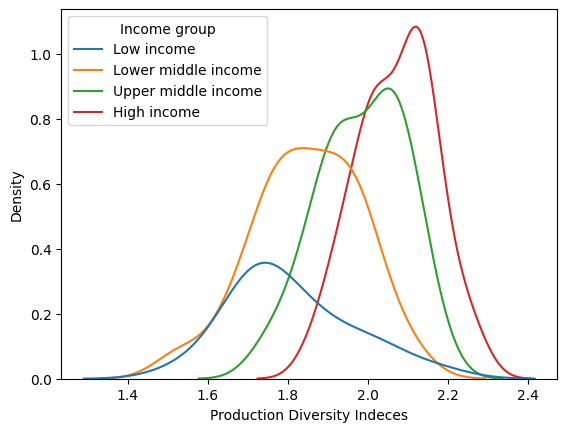

<Figure size 640x480 with 0 Axes>

In [113]:
# Plotting a KDE plot to visualize the distribution of Shannon Values

fig, ax = plt.subplots()

sns.kdeplot(data=food_supply_diversity_economized,
            x= "Production Diversity Indeces",
            hue= "Income group",
            ax=ax)

plt.show()

# plt.savefig("kde_shannon.png") # It kept exporting a blank image. If you're using VS Code as I'm, go to the top-right corner of the output. You'll see the option to save the image there.

In [38]:
# Number of countries from each group in this indicator

df_aggregated_food_supplies.groupby("Income group").count().iloc[:, 0]

Income group
High income            46
Low income             21
Lower middle income    44
Upper middle income    45
Name: Region, dtype: int64

### Modified Functional Attibutite Diversity

This indicator measures how nutrient diverse food items are in a country. Different from Shannon Diversity, MFAD can check if even different food types are diverse in-terms of nutrients they have. The food composition data was taken from the USA's ,

In [39]:
#1. Merging the Food Supply Data from FAO and the Food Composition table.

# 1.1 Taking a glimpse of the food supply data to see the names of the foods used there.

display(imputed_by_mice.head(3))

,Income group,Region,Apples and products,"Aquatic Animals, Others",Aquatic Plants,Bananas,Barley and products,Beans,Bovine Meat,"Butter, Ghee",...,Soyabeans,"Spices, Other",Sugar (Raw Equivalent),Sunflowerseed Oil,Sweet potatoes,"Sweeteners, Other",Tea (including mate),Tomatoes and products,"Vegetables, other",Wheat and products
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.0,5.0,3.0,0.1,-0.0,3.1,0.1,0.0,2.7,1.0,...,0.0,0.1,15.2,1.3,0.0,0.5,2.0,0.9,55.4,159.0
Angola,2.0,6.0,0.4,0.0,0.0,37.3,0.0,7.2,4.2,0.0,...,0.4,0.0,12.5,0.3,39.5,9.2,0.0,2.1,20.5,27.2
Albania,3.0,1.0,32.7,0.0,0.0,8.3,0.2,5.0,13.2,1.5,...,0.0,0.0,16.6,4.7,0.0,24.2,0.2,77.9,217.4,124.7


In [284]:
# 1.2 Importing the Food Composition Data

food_composition_table = pd.read_csv('food_composition_data.csv')

# display(food_composition_table.head())


# food_composition_table.pivot_table(index= ["food_name", "food_group"],
#                                    columns="nutr_name",
#                                    values="nutr_value").iloc[60:80]

In [41]:
# DO NOT RUN THIS PIECE OF CODE. ITS OUTPUT HAS ALREADY BEEN SAVED AND USED IN THE FOLLOWING CODE SNIPPETS.


## 1.5 Condensing food items such that we've a median value of nutrient values of each nutrient from each food type.

### I. Take a peek of your data

#display(food_composition_transposed.head())


### II. The initial columns' names are confusing. Taking them to the back

# food_compos_modified = food_composition_transposed[food_composition_transposed.columns.sort_values(ascending=False)]

#display(food_compos_modified.head())



### III. We don't want an index name for the columns. Removing it, and resetting row indexes to be food codes.

# better_food_compos_table = food_compos_modified.rename_axis(None, axis=1).reset_index()

# better_food_compos_table_1 = better_food_compos_table.set_index('food_code')

#display(better_food_compos_table_1.head())



### IV. Beginning condensing the foods: Writting a program that will do just that

# condensed_foods = pd.DataFrame()

# food_compos_aft_reduction = pd.DataFrame


def food_condenser() :    
    """ Condenses similar food types of a similar food group from the food_composition table """
    
    
    # Designing a better user experience btn the 1st iteration and the subsequent ones
    first_iter = 0
    
    new_iter = 0
    
    
    # Iteration starts
    while new_iter == first_iter :
        
        new_iter = 1 + first_iter
        
        start = input('Welcome. Should I start condensing? [Y/n]: ').upper()
        
        while start == 'Y' :
    
            print("""
            This is a preview of the food composition table as it is now. \n
            Please choose any word from the "food_name" column and the "food_group" column \n
            and then enter them in the prompts that follow..\n
            DO NOT WRITE the whole string for the food name, just the main food type (eg. butter, cheese, etc,)
            For the Food Group name, write the whole name. \n
            
            ATTENTION: Names in the "food_group" column are case sensitive.
            """.upper())
        
            display(better_food_compos_table_1.head(4))
            
            
            # Taking the group name
            food_group = input('Please write the food_group name: ')
            
            
            # Filtering the main_compos table for the aforementioned food_group
            group = better_food_compos_table_1[better_food_compos_table_1['food_group'].str.contains(food_group)]
            
            
            # Cutting of the desired food_group from the main-compos table
            remaining_groups = better_food_compos_table_1[ ~better_food_compos_table_1['food_group'] \
                                                         .isin(group['food_group'])
                                                        ]
            
            
            # Updating the food_compos table such that we only have food that haven't been condensed:
            food_compos_aft_reduction = remaining_groups
            
            
            # Getting the medium values for all nutrients in the desired food_and_food_group table
            median_vals = pd.DataFrame(data=group.iloc[:, 2:].aggregate('median', axis=0)).T
            
            
            # Attaching the food_name and food_group_name to the median values
            food_name = pd.DataFrame(data=[food_group], columns=['food_group'])

            compressed_values = pd.concat([food_name, median_vals], axis=1)
            
            
            # Attaching this to the "Condensed_foods" table
            
            global condensed_foods
            
            condensed_foods = pd.concat([condensed_foods, compressed_values], axis=0)
            
            display(condensed_foods)
            
            start = 'n'

    
    # For Subsequent iterations
    continuation = input('Do you want to repeat this process? [Y/n]: ').upper()
    
    
    while continuation == 'Y' :
            
        count = new_iter + 1
            
        print("""The names in the "food_group" column are case sensitive, remember that.\n
        This is the preview of the table as it is now.""".upper())
            
        display(food_compos_aft_reduction.head(4))
            
            
        # Taking the name of the food
        #name = input('Please write the food name: ').upper()
            
            
        # Taking the group name
        food_group = input('Please write the food_group name: ')
            
            
        # Filtering the main_compos table for the aforementioned food
        group = food_compos_aft_reduction[food_compos_aft_reduction['food_group'].str.contains(food_group)]
            
            
        # Cutting of the desired food from the main-compos table
        remaining_groups = food_compos_aft_reduction[ ~food_compos_aft_reduction['food_name'] \
                                                         .isin(group['food_name'])
                                                        ]
            
            
        # Updating the food_compos table such that we only have food that haven't been condensed:
        food_compos_aft_reduction = remaining_groups
            
            
        # Getting the medium values for all nutrients in the desired food_and_food_group table
        median_vals = pd.DataFrame(data=group.iloc[:, 2:].aggregate('median', axis=0)).T
            
            
        # Attaching the food_name and food_group_name to the median values
        food_name = pd.DataFrame(data=[food_group], columns=['food_group'])

        compressed_values = pd.concat([food_name, median_vals], axis=1)
            
            
        # Attaching this to the "Condensed_foods" table
        condensed_foods = pd.concat([condensed_foods, compressed_values], axis=0)
        
        
        # displaying the new "condensed_foods" table
        display(condensed_foods)
                
        # Re-running the procedure
        continuation = input('Do you want to repeat this process? [Y/n]: ').upper()
        
        
    return condensed_foods


# Condensing: Iteration 1:
#food_condenser()

#display(condensed_foods)

##### Notes for the food condenser

I took the median value for each food group to make the process of condensing the foods easier and straightforward.  

There were too many foods, whose names were formatted differently, and the way I've done it is the easiest way and most efficient in being able to generalize the nutrition value for each food group.

In [42]:
# Saving the output table to a variable and resetting the index

#condensed_food_compos = condensed_foods.reset_index()

#display(condensed_food_compos)


# Removing the first "index" column:

#condensed_food_compos_table = condensed_food_compos.drop("index", axis=1)

#display(condensed_food_compos_table)


# Saving the output to csv:

#condensed_food_compos_table.to_csv("Condensed_Food_Composition_Table.csv", index=True)

In [43]:
# UPLOADING THE TABLE ABOVE AGAIN AFTER A LONG TIME

nutritional_content_table = pd.read_csv("01. Clean Datasets/Indicator_3/1_Condensed_Food_Composition_Table.csv")

display(nutritional_content_table.head())

,Unnamed: 0,food_group,"Zinc, Zn",Water,Vitamin K (phylloquinone),"Vitamin E, added",Vitamin E (alpha-tocopherol),Vitamin D3 (cholecalciferol),Vitamin D2 (ergocalciferol),Vitamin D (D2 + D3),...,16:1 t,16:1 c,16:0,15:1,15:0,14:1,14:0,13:0,12:0,10:0
0,0,Dairy and Egg Products,0.825,63.550,0.6,0.0,0.18,0.5,0.0,0.5,...,0.0335,0.1210,1.9930,0.0,0.020,0.016,0.297,0.0000,0.093,0.076
1,1,Spices and Herbs,2.840,9.310,24.6,0.0,1.69,NaN,NaN,0.0,...,0.0000,0.0080,0.5740,0.0,0.000,0.000,0.020,0.0000,0.002,0.000
2,2,Baby Foods,0.490,83.200,5.1,0.0,0.56,0.1,0.0,0.0,...,0.0000,0.0010,0.4260,0.0,0.000,0.000,0.031,0.0000,0.007,0.001
3,3,Fats and Oils,0.000,0.070,42.2,0.0,5.00,0.7,0.0,0.0,...,0.0000,0.0685,7.9895,0.0,0.014,0.000,0.095,0.0005,0.000,0.000
4,4,Poultry Products,2.020,66.505,0.0,0.0,0.22,0.2,NaN,0.2,...,0.0040,0.1970,1.5200,0.0,0.006,0.008,0.056,NaN,0.010,0.000


In [44]:
# Removing the column "Unnamed" and the last row that is empty:
nutrition_table = nutritional_content_table.iloc[:17, 1:].set_index("food_group")

#display(nutrition_table)

groups_nutrition_table = nutrition_table.index

#display(groups_nutrition_table)



# Combining the groups such that one has groups equal to the ones in the intake tables.
nutrition_table

nutrition_table.loc["Beef Products"] = nutrition_table.loc["Beef Products"] + \
                                       nutrition_table.loc["Sausages and Luncheon Meats"]

nutrition_table.loc["Seeds, Nuts, and Oils"] = nutrition_table.loc["Nut and Seed Products"] + \
                                    nutrition_table.loc["Fats and Oils"]

nutrition_table.loc["Breakfast Cereals"] = nutrition_table.loc["Breakfast Cereals"] + \
                                           nutrition_table.loc["Soups, Sauces, and Gravies"] + \
                                           nutrition_table.loc["Snacks"]

nutrition_table = nutrition_table.drop(["Sausages and Luncheon Meats", 
                                        "Fats and Oils", 
                                        "Soups, Sauces, and Gravies", 
                                        "Snacks",
                                        "Nut and Seed Products"])

nutrition_table

,"Zinc, Zn",Water,Vitamin K (phylloquinone),"Vitamin E, added",Vitamin E (alpha-tocopherol),Vitamin D3 (cholecalciferol),Vitamin D2 (ergocalciferol),Vitamin D (D2 + D3),Vitamin D,"Vitamin C, total ascorbic acid",...,16:1 t,16:1 c,16:0,15:1,15:0,14:1,14:0,13:0,12:0,10:0
food_group,,,,,,,,,,,,,,,,,,,,,
Dairy and Egg Products,0.825,63.550,0.60,0.0,0.180,0.50,0.00,0.50,20.0,0.0,...,0.0335,0.1210,1.9930,0.0,0.020,0.0160,0.2970,0.0000,0.0930,0.0760
Spices and Herbs,2.840,9.310,24.60,0.0,1.690,NaN,NaN,0.00,0.0,15.2,...,0.0000,0.0080,0.5740,0.0,0.000,0.0000,0.0200,0.0000,0.0020,0.0000
Baby Foods,0.490,83.200,5.10,0.0,0.560,0.10,0.00,0.00,2.0,7.9,...,0.0000,0.0010,0.4260,0.0,0.000,0.0000,0.0310,0.0000,0.0070,0.0010
Poultry Products,2.020,66.505,0.00,0.0,0.220,0.20,NaN,0.20,7.0,0.0,...,0.0040,0.1970,1.5200,0.0,0.006,0.0080,0.0560,NaN,0.0100,0.0000
Breakfast Cereals,4.310,97.495,4.55,0.0,2.430,NaN,NaN,3.55,141.0,9.0,...,NaN,NaN,2.6180,NaN,NaN,NaN,0.5175,NaN,1.3630,0.1230
Fruits and Fruit Juices,0.090,84.010,1.55,0.0,0.180,0.50,NaN,0.00,0.0,8.0,...,0.0000,0.0040,0.0160,0.0,0.001,0.0000,0.0000,NaN,0.0000,0.0000
Pork Products,2.275,65.125,0.00,0.0,0.220,0.70,0.00,0.70,27.0,0.0,...,0.0010,0.1080,1.8020,0.0,0.000,0.0000,0.1050,NaN,0.0050,0.0060
Vegetables and Vegetable Products,0.330,89.180,9.50,0.0,0.295,0.00,0.40,0.00,0.0,11.0,...,0.0000,0.0030,0.0420,0.0,0.000,0.0000,0.0010,0.0000,0.0000,0.0000
Beef Products,6.990,118.575,2.00,0.0,0.540,0.70,NaN,0.80,31.5,0.0,...,0.0350,0.9430,6.9660,0.0,0.057,0.0615,0.5695,NaN,0.0275,0.0285


In [374]:
# Checking the modified functional diversity of the groups above before we combine them to make the seven groups we've been using since the beginning.


# Writing the MFAD function

def MFAD(df):
    """Calculates the MFAD value for a given df"""


    # Giving the user the picture of their dataset
    display("""Below is the dataframe as it is now:""")

    display(df)

    proceed = input("Do you want to proceed [y/n]: ").upper()


    # Calculating the MFAD
    
    MFAD_values = list()

    # defining the starting and ending points of the summation symbols.
    n = range(1, df.index.__len__()+1)
    
    while proceed == "Y" :
        species = int(input("Put the index of the item you want to use as your 'i': "))

        for j, val in df.iterrows():
            if j == df.iloc[[species]].index :
                continue
            else :
                distance = np.sqrt(((df.iloc[species] - val)**2).sum()) # Calculates the Eucledian distance.

                mfad = (distance / df.columns.__len__()) / 10000 # Completes the MFAD formula

                i = df.iloc[[species]].index.item() # Extracts the index for the i

                MFAD_values.append({f"{i} - {j}" : mfad})

        proceed = input("Do you have more food items for eucledian distance? [y/n]:").upper()

    
    MFAD_values = pd.DataFrame(MFAD_values).T#.rename_axis("eucledian(i - j)").T


    # Creating a program that names columns according to the number of items in the dataset.
    frame = pd.DataFrame()

    some_list = list()
    
    # Removing NAN's from each row in the dataset
    for i, val in MFAD_values.iterrows():
        j = MFAD_values.loc[[i]].dropna(axis=1)

        some_list.append(j)

        
    for i in range(0, len(some_list)) :
        some_list[i].columns = ["mfad_values"]

        frame = pd.concat([frame, some_list[i]], axis=0, ignore_index=False)

    # Removing duplicate values
    clean_frame = frame.drop_duplicates()


    # # Normalizing the MFAD values
    # clean_frame.loc[:, "Normalized_MFAD"] = (clean_frame["mfad_values"] - clean_frame["mfad_values"].mean()) /\
    #                                           (clean_frame["mfad_values"].max() - clean_frame["mfad_values"].min())


    # # Summing the mfad values from each iteration of i/j up to n
    clean_frame.loc["Total"] = clean_frame["mfad_values"].sum()

    return clean_frame

In [46]:
# Using the MFAD() to see how dissimilar different food groups are in the food_composition table

# mfad_nutr_table = MFAD(nutrition_table)

# display(mfad_nutr_table)

In [47]:
# Storing the table so that I don't have to generate it again.

#mfad_nutr_table.to_csv("mfad_nutr_table.csv", index=True)

# mfad_nutr_table.iloc[0:13]

In [164]:
# Categorizing food groups in the composition table into food groups in the intake table

daily_dietary_intake

food_groups_compos_table = pd.DataFrame(nutrition_table.index)

food_groups_intake_table = pd.DataFrame(daily_dietary_intake.iloc[:, 1:].columns)

food_groups_intake_table.columns = ["Food_groups_intake_table"]

food_groups_compos_table.columns = ["Food_groups_compos_table"]

food_groups_intake_table_sorted = food_groups_intake_table.sort_values("Food_groups_intake_table").reset_index().drop("index", axis=1)

food_groups_compos_table

# food_groups_intake_table_sorted

,Food_groups_compos_table
0,Dairy and Egg Products
1,Spices and Herbs
2,Baby Foods
3,Poultry Products
4,Breakfast Cereals
5,Fruits and Fruit Juices
6,Pork Products
7,Vegetables and Vegetable Products
8,Beef Products
9,Beverages


In [49]:
# Renaming foods in the composition table
food_groups_compos_table.iloc[4, 0] = "Cereals"
food_groups_compos_table.iloc[0, 0] = "Dairy & Egg Products"
food_groups_compos_table.iloc[3, 0] = "Poultry"
food_groups_compos_table.iloc[1, 0] = "Spices & Herbs"
food_groups_compos_table.iloc[6, 0] = "Pork"
food_groups_compos_table.iloc[7, 0] = "Vegetables"
food_groups_compos_table.iloc[2, 0] = "Infant food"
food_groups_compos_table.iloc[9, 0] = "Starchs & Sugars"
food_groups_compos_table.iloc[10, 0] = "Finfish / Shellfish Products"
food_groups_compos_table.iloc[11, 0] = "Legumes & Products"

food_groups_compos_table_sorted = food_groups_compos_table.sort_values("Food_groups_compos_table", ascending=True).reset_index().drop("index", axis=1)

# food_groups_compos_table_sorted = food_groups_compos_table.sort_values("Food_groups_comps_table")

food_group_names = pd.concat([food_groups_intake_table_sorted, food_groups_compos_table_sorted], axis=1)

food_group_names

,Food_groups_intake_table,Food_groups_compos_table
0,Beef Products,Beef Products
1,Cereals,Cereals
2,Dairy & Egg Products,Dairy & Egg Products
3,Finfish / Shellfish Products,Finfish / Shellfish Products
4,Fruits & Plantains,Fruits and Fruit Juices
5,Infant food,Infant food
6,Legumes & Products,Legumes & Products
7,Pork,Pork
8,Poultry,Poultry
9,Roots & Tubers,"Seeds, Nuts, and Oils"


In [341]:
# Loading the food supply table

df_aggregated_food_supplies.head()

,Income group,Region,Cereals,Roots & Tubers,Vegetables,Fruits & Plantains,"Seeds, Nuts, and Oils",Starch and Sugars,Infant Food,Dairy and Egg Products,Finfish / Shellfish Products,Beef Products,Poultry,Legume and Legume Products,Spices & Herbs
Country,,,,,,,,,,,,,,,
Spain,High income,Europe & Central Asia,113.1,60.3,120.2,93.7,48.5,32.5,0.4,182.0,40.8,21.8,33.3,5.8,0.4
Chile,High income,Latin America & Caribbean,153.3,57.9,71.9,59.9,10.8,41.2,0.0,94.1,14.0,26.8,38.7,3.9,1.5
Iceland,High income,Europe & Central Asia,84.4,35.6,77.2,89.1,28.0,80.6,0.3,232.1,91.2,42.8,31.4,1.1,1.6
Sweden,High income,Europe & Central Asia,115.0,53.9,85.1,60.9,21.8,46.5,0.3,234.7,32.3,32.8,16.3,2.5,1.1
Slovenia,High income,Europe & Central Asia,140.1,38.1,99.5,104.7,16.6,44.7,0.0,192.0,13.2,20.9,29.1,1.4,0.3


In [347]:
# Grouping the data according to "Income group"

food_supplies_grouped = df_aggregated_food_supplies.drop("Region", axis=1).groupby("Income group")

median_food_supplies = food_supplies_grouped.median()

mean_food_supplies = food_supplies_grouped.mean()

# display(median_food_supplies)
# display(mean_food_supplies)

In [350]:
# The median_food_supplies table was taken for data robustness

## Multiplying the values to turn them into grams. Multiplied by ten because the values in the composition table are expressed in-terms of 100 grams.

median_food_supplies_in_grams = np.round(mean_food_supplies * 10)

median_food_supplies_in_grams

,Cereals,Roots & Tubers,Vegetables,Fruits & Plantains,"Seeds, Nuts, and Oils",Starch and Sugars,Infant Food,Dairy and Egg Products,Finfish / Shellfish Products,Beef Products,Poultry,Legume and Legume Products,Spices & Herbs
Income group,,,,,,,,,,,,,
High income,1244.0,463.0,1002.0,834.0,298.0,531.0,5.0,1591.0,287.0,250.0,316.0,46.0,16.0
Low income,1111.0,331.0,512.0,719.0,161.0,116.0,1.0,346.0,69.0,125.0,39.0,139.0,5.0
Lower middle income,1610.0,437.0,728.0,748.0,298.0,290.0,2.0,492.0,164.0,164.0,115.0,84.0,14.0
Upper middle income,1472.0,482.0,1135.0,1034.0,222.0,471.0,4.0,1116.0,159.0,200.0,281.0,57.0,24.0


In [351]:
# Checking the food group names in the composition table

nutrition_table

,"Zinc, Zn",Water,Vitamin K (phylloquinone),"Vitamin E, added",Vitamin E (alpha-tocopherol),Vitamin D3 (cholecalciferol),Vitamin D2 (ergocalciferol),Vitamin D (D2 + D3),Vitamin D,"Vitamin C, total ascorbic acid",...,16:1 t,16:1 c,16:0,15:1,15:0,14:1,14:0,13:0,12:0,10:0
food_group,,,,,,,,,,,,,,,,,,,,,
Dairy and Egg Products,0.825,63.550,0.60,0.0,0.180,0.50,0.00,0.50,20.0,0.0,...,0.0335,0.1210,1.9930,0.0,0.020,0.0160,0.2970,0.0000,0.0930,0.0760
Spices and Herbs,2.840,9.310,24.60,0.0,1.690,NaN,NaN,0.00,0.0,15.2,...,0.0000,0.0080,0.5740,0.0,0.000,0.0000,0.0200,0.0000,0.0020,0.0000
Baby Foods,0.490,83.200,5.10,0.0,0.560,0.10,0.00,0.00,2.0,7.9,...,0.0000,0.0010,0.4260,0.0,0.000,0.0000,0.0310,0.0000,0.0070,0.0010
Poultry Products,2.020,66.505,0.00,0.0,0.220,0.20,NaN,0.20,7.0,0.0,...,0.0040,0.1970,1.5200,0.0,0.006,0.0080,0.0560,NaN,0.0100,0.0000
Breakfast Cereals,4.310,97.495,4.55,0.0,2.430,NaN,NaN,3.55,141.0,9.0,...,NaN,NaN,2.6180,NaN,NaN,NaN,0.5175,NaN,1.3630,0.1230
Fruits and Fruit Juices,0.090,84.010,1.55,0.0,0.180,0.50,NaN,0.00,0.0,8.0,...,0.0000,0.0040,0.0160,0.0,0.001,0.0000,0.0000,NaN,0.0000,0.0000
Pork Products,2.275,65.125,0.00,0.0,0.220,0.70,0.00,0.70,27.0,0.0,...,0.0010,0.1080,1.8020,0.0,0.000,0.0000,0.1050,NaN,0.0050,0.0060
Vegetables and Vegetable Products,0.330,89.180,9.50,0.0,0.295,0.00,0.40,0.00,0.0,11.0,...,0.0000,0.0030,0.0420,0.0,0.000,0.0000,0.0010,0.0000,0.0000,0.0000
Beef Products,6.990,118.575,2.00,0.0,0.540,0.70,NaN,0.80,31.5,0.0,...,0.0350,0.9430,6.9660,0.0,0.057,0.0615,0.5695,NaN,0.0275,0.0285


In [368]:
# Multiplying values from each income group to determine the nutrient supply in the economy

# Creating a function that'll do that
def nutrient_supply(df) :
    """Calculates nutrient supplies for a particular country or country group"""

    column_names = list(nutrition_table.columns.values)

    index_names = list(df.columns.values)

    index_names.remove("Roots & Tubers")

    nutrient_supplies = pd.DataFrame([df["Cereals"].values * nutrition_table.loc["Breakfast Cereals"].values,
                                      df["Vegetables"].values * nutrition_table.loc["Vegetables and Vegetable Products"].values,
                                      df["Fruits & Plantains"].values * nutrition_table.loc["Fruits and Fruit Juices"].values,
                                      df["Seeds, Nuts, and Oils"].values * nutrition_table.loc["Seeds, Nuts, and Oils"].values,
                                      df["Starch and Sugars"].values * nutrition_table.loc["Beverages"].values,
                                      df["Infant Food"].values * nutrition_table.loc["Baby Foods"].values,
                                      df["Dairy and Egg Products"].values * nutrition_table.loc["Dairy and Egg Products"].values,
                                      df["Finfish / Shellfish Products"].values * nutrition_table.loc["Finfish and Shellfish Products"].values,
                                      df["Beef Products"].values * nutrition_table.loc["Beef Products"].values,
                                      df["Poultry"].values * nutrition_table.loc["Poultry Products"].values,
                                      df["Legume and Legume Products"].values * nutrition_table.loc["Legumes and Legume Products"].values,
                                      df["Spices & Herbs"].values * nutrition_table.loc["Spices and Herbs"].values])
    
    nutrient_supplies.columns = column_names

    nutrient_supplies.index = index_names
    
    return nutrient_supplies



nutrient_supply_high_income = nutrient_supply(median_food_supplies_in_grams.loc[["High income"]])

nutrient_supply_upper_middle = nutrient_supply(median_food_supplies_in_grams.loc[["Upper middle income"]])

nutrient_supply_lower_middle = nutrient_supply(median_food_supplies_in_grams.loc[["Lower middle income"]])

nutrient_supply_low_income = nutrient_supply(median_food_supplies_in_grams.loc[["Low income"]])


# Just for checking if everything worked out

# display(nutrient_supply_lower_middle)

In [390]:
# Calculating the MFAD values for each nutrient supply table

# mfad_low_income = MFAD(nutrient_supply_low_income)

# mfad_high_income = MFAD(nutrient_supply_high_income)

# mfad_lower_middle = MFAD(nutrient_supply_lower_middle)

# mfad_upper_middle = MFAD(nutrient_supply_upper_middle)


# Just Checking one of the output

# mfad_lower_middle

In [392]:
# Saving the outputs of the tables above so that I don't have to re-run the piece of code above

# mfad_low_income.to_csv("01. Clean Datasets/Metric_1/Indicator_3/3_mfad_low_income.csv")

# mfad_lower_middle.to_csv("01. Clean Datasets/Metric_1/Indicator_3/4_mfad_lower_middle.csv")

# mfad_upper_middle.to_csv("01. Clean Datasets/Metric_1/Indicator_3/5_mfad_upper_middle.csv")

# mfad_high_income.to_csv("01. Clean Datasets/Metric_1/Indicator_3/6_mfad_high_income.csv")

In [397]:
# Loading in the mfad datasets: You have to the set index again as Microsoft re-indexes the frame automatically when you save it in csv 
mfad_low_income = pd.read_csv("01. Clean Datasets/Metric_1/Indicator_3/3_mfad_low_income.csv").set_index("Unnamed: 0")

mfad_lower_middle = pd.read_csv("01. Clean Datasets/Metric_1/Indicator_3/4_mfad_lower_middle.csv").set_index("Unnamed: 0")

mfad_upper_middle = pd.read_csv("01. Clean Datasets/Metric_1/Indicator_3/5_mfad_upper_middle.csv").set_index("Unnamed: 0")

mfad_high_income = pd.read_csv("01. Clean Datasets/Metric_1/Indicator_3/6_mfad_high_income.csv").set_index("Unnamed: 0")



# Combining MFAD values of each income group
mfad_all_groups = pd.DataFrame([mfad_low_income.loc["Total"].values[0],
                                mfad_lower_middle.loc["Total"].values[0],
                                mfad_upper_middle.loc["Total"].values[0],
                                mfad_high_income.loc["Total"].values[0]],
                                columns=["mfad_values"],
                                index=["Low income", 
                                       "Lower middle income",
                                       "Upper middle income",
                                       "High income"])

mfad_all_groups

,mfad_values
Low income,34.807447
Lower middle income,51.482283
Upper middle income,49.566934
High income,47.364805


## Metric 2: Ecosystem Stability

### 1st Indicator: Ecosystem Status

In [50]:
# Loading the dataset

epi = pd.read_csv("materials_and_methods/Metric_2/indicator_1.csv")

epi.head()

,code,iso,country,region,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,...,CCH.rnk.old,CDA.rnk.old,CHA.rnk.old,FGA.rnk.old,NDA.rnk.old,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old
0,4,AFG,Afghanistan,Southern Asia,43.6,16.0,15.5,7.4,16.0,18.4,...,159,161,164,NaN,141,142,112,12.0,129,1
1,24,AGO,Angola,Sub-Saharan Africa,30.5,20.5,23.1,17.9,24.0,36.8,...,81,29,35,77.0,132,105,119,135.0,1,87
2,8,ALB,Albania,Eastern Europe,47.1,40.0,37.5,34.5,36.7,63.7,...,108,156,26,77.0,70,173,39,37.0,25,67
3,784,ARE,United Arab Emirates,Greater Middle East,52.4,49.4,41.7,100.0,3.4,20.4,...,171,143,112,37.0,163,134,157,162.0,141,173
4,32,ARG,Argentina,Latin America & Caribbean,41.1,56.3,52.0,60.5,48.2,51.8,...,148,99,107,59.0,128,1,160,128.0,93,134


In [51]:
# Removing unwanted columns and resetting the index.

epi_cleaned = epi.iloc[:, [2, 4]].set_index("country")

epi_cleaned.head()

,EPI.new
country,
Afghanistan,43.6
Angola,30.5
Albania,47.1
United Arab Emirates,52.4
Argentina,41.1


### 2nd Indicator: Per Capita GHG Emissions

In [52]:
# Loading the dataset

emissions = pd.read_csv("materials_and_methods/Metric_2/indicator_2.csv")

emissions.head()


# Removing unwanted columns
emissions_only_from_agric = emissions.iloc[:, [0, 2, 7]]

emissions_only_from_agric.head(32)


# Removing unwanted rows
agricultural_emissions_2019 = emissions_only_from_agric[emissions_only_from_agric["Year"] == 2019].set_index("Entity")#.drop("index", axis=1)

agricultural_emissions_2019.head(32)


# Filtering Countries to have the same ones as previous tables
emissions_of_sampled_countries = pd.merge(size_of_economy,
                                        agricultural_emissions_2019,
                                        left_index=True,
                                        right_index= True)

emissions_of_sampled_countries.head(10)


# Checking the number of countries we have in the cleaned dataset
emissions_of_sampled_countries.info()


# Exploratory Data Analysis: Which group pollutes more?

emissions_of_sampled_countries
emissions_of_sampled_countries.groupby("Income group").agg({"Agriculture (per capita)" : 'mean'})

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income group              168 non-null    object 
 1   Region                    168 non-null    object 
 2   Year                      168 non-null    int64  
 3   Agriculture (per capita)  167 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.6+ KB


,Agriculture (per capita)
Income group,
High income,1.128405
Low income,1.291088
Lower middle income,0.966858
Upper middle income,0.918613


In [53]:
# The number of countries from each income group in this indicator

emissions_of_sampled_countries.groupby("Income group").count()

,Region,Year,Agriculture (per capita)
Income group,,,
High income,50,50,49
Low income,22,22,22
Lower middle income,46,46,46
Upper middle income,50,50,50


### Indicator 3: Per Capita Net Freshwater Withdrawal

In [54]:
# Loading the dataset

water_withdrawals = pd.read_csv("materials_and_methods/Metric_2/indicator_3.csv")

water_withdrawals.head()

,Entity,Code,Year,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
0,Afghanistan,AFG,1987,99.000046
1,Afghanistan,AFG,1988,98.972824
2,Afghanistan,AFG,1989,98.944450
3,Afghanistan,AFG,1990,98.914856
4,Afghanistan,AFG,1991,98.883950


In [55]:
# Removing unwanted columns

water_withdrawals_cleaned = water_withdrawals.iloc[:, [0, 2, 3]]

water_withdrawals_cleaned.head()

,Entity,Year,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
0,Afghanistan,1987,99.000046
1,Afghanistan,1988,98.972824
2,Afghanistan,1989,98.944450
3,Afghanistan,1990,98.914856
4,Afghanistan,1991,98.883950


In [56]:
# Removing Unwanted Years

water_withdrawals_filtered = water_withdrawals_cleaned[water_withdrawals_cleaned["Year"] == 2019]

water_withdrawals_filtered.head()

,Entity,Year,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
32,Afghanistan,2019,98.169624
62,Albania,2019,61.184790
102,Algeria,2019,63.764100
135,Angola,2019,20.784925
165,Antigua and Barbuda,2019,15.652174


In [57]:
# Reseting the index

water_withdrawals_filtered_cleaned = water_withdrawals_filtered.set_index("Entity")

water_withdrawals_filtered_cleaned.head()

,Year,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
Entity,,
Afghanistan,2019,98.169624
Albania,2019,61.184790
Algeria,2019,63.764100
Angola,2019,20.784925
Antigua and Barbuda,2019,15.652174


In [58]:
# Merging the table above with size_of_economy table

water_withdrawals_economized = pd.merge(size_of_economy,
                                        water_withdrawals_filtered_cleaned,
                                        left_index=True,
                                        right_index= True).drop(["Region", "Year"], axis=1)

water_withdrawals_economized.head()

,Income group,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
Afghanistan,Low income,98.169624
Angola,Lower middle income,20.784925
Albania,Upper middle income,61.184790
United Arab Emirates,High income,48.185406
Argentina,Upper middle income,73.928000


In [59]:
# Exploratory Data Analysis

water_withdrawals_grouped_mean = water_withdrawals_economized.groupby("Income group").mean()

display(water_withdrawals_grouped_mean.head())

water_withdrawals_grouped_median = water_withdrawals_economized.groupby("Income group").median()

display(water_withdrawals_grouped_median)

,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
Income group,
High income,31.137505
Low income,67.045932
Lower middle income,69.757238
Upper middle income,52.959919


,"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)"
Income group,
High income,19.056874
Low income,76.105287
Lower middle income,76.718895
Upper middle income,59.994469


### Indicator 5: Per Capita Land Use

In [60]:
# Importing the dataset

land_use = pd.read_csv("materials_and_methods/Metric_2/indicator_5.csv")

land_use.head(60)

,Entity,Code,Year,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
0,Afghanistan,AFG,1961,4.288897
1,Afghanistan,AFG,1962,4.210031
2,Afghanistan,AFG,1963,4.128873
3,Afghanistan,AFG,1964,4.048203
4,Afghanistan,AFG,1965,3.959685
5,Afghanistan,AFG,1966,3.875335
6,Afghanistan,AFG,1967,3.794092
7,Afghanistan,AFG,1968,3.706168
8,Afghanistan,AFG,1969,3.620566
9,Afghanistan,AFG,1970,3.534464


In [61]:
# Selecting the relevant year

land_use_filtered = land_use[land_use["Year"] == 2019]

land_use_filtered

,Entity,Code,Year,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
58,Afghanistan,AFG,2019,1.006368
118,Africa,NaN,2019,0.845206
178,Albania,ALB,2019,0.408507
238,Algeria,DZA,2019,0.968469
298,American Samoa,ASM,2019,0.084705
...,...,...,...,...
12985,Western Sahara,ESH,2019,9.183623
13045,World,OWID_WRL,2019,0.611890
13105,Yemen,YEM,2019,0.743406
13196,Zambia,ZMB,2019,1.296811


In [62]:
# Removing columns that are not wanted.

land_use_cleaned = land_use_filtered.drop(["Code", "Year"], axis=1)

land_use_cleaned

,Entity,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
58,Afghanistan,1.006368
118,Africa,0.845206
178,Albania,0.408507
238,Algeria,0.968469
298,American Samoa,0.084705
...,...,...
12985,Western Sahara,9.183623
13045,World,0.611890
13105,Yemen,0.743406
13196,Zambia,1.296811


In [63]:
# Re-indexing the dataframe

land_use_completely_cleaned = land_use_cleaned.set_index("Entity").rename_axis("Country")

land_use_completely_cleaned

,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
Country,
Afghanistan,1.006368
Africa,0.845206
Albania,0.408507
Algeria,0.968469
American Samoa,0.084705
...,...
Western Sahara,9.183623
World,0.611890
Yemen,0.743406


In [64]:
# Joining the table with sizes of economies

land_use_economized = pd.merge(size_of_economy,
                               land_use_completely_cleaned,
                               left_index=True,
                               right_index=True).drop("Region", axis=1)

land_use_economized.head()

,Income group,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
Country,,
Aruba,High income,0.018787
Afghanistan,Low income,1.006368
Angola,Lower middle income,1.760314
Albania,Upper middle income,0.408507
Andorra,High income,0.246199


In [65]:
# Exploratory Data Analysis

land_use_grouped_mean = land_use_economized.groupby("Income group").mean()

display(land_use_grouped_mean)

land_use_grouped_median = land_use_economized.groupby("Income group").median()

display(land_use_grouped_median)

,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
Income group,
High income,0.824785
Low income,1.178552
Lower middle income,1.520275
Upper middle income,1.403417


,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
Income group,
High income,0.228527
Low income,0.990771
Lower middle income,0.420939
Upper middle income,0.467098


## Metric 3: Food Affordability and Availability

### Indicator 1: Food Affordability

In [66]:
# Loading the dataset

affordability = pd.read_csv("materials_and_methods/Metric_3/indicator_1.csv", header=None)

affordability.head()

,0,1
0,Australia,93.3
1,Singapore,93.2
2,Netherlands,92.7
3,Belgium,92.6
4,Ireland,92.6


In [67]:
# Resetting the index and renaming columns

affordability_cleaned = affordability.rename(columns={0: "Countries", 1: "Affordability Scores"}).set_index("Countries")

affordability_cleaned

,Affordability Scores
Countries,
Australia,93.3
Singapore,93.2
Netherlands,92.7
Belgium,92.6
Ireland,92.6
...,...
Haiti,32.8
Burundi,32.5
Syria,32.0


In [68]:
# Attaching that table with size of economies

affordability_economized = pd.merge(size_of_economy,
                                    affordability_cleaned,
                                    left_index=True,
                                    right_index=True).drop("Region", axis=1)

affordability_economized

,Income group,Affordability Scores
Angola,Lower middle income,35.5
United Arab Emirates,High income,86.7
Argentina,Upper middle income,62.0
Australia,High income,93.3
Austria,High income,91.3
...,...,...
United States,High income,87.1
Uzbekistan,Lower middle income,52.7
Vietnam,Lower middle income,84.0
South Africa,Upper middle income,63.4


In [69]:
# Exploratory Data Analysis: Checking the sample size for each country group

affordability_income_groups_counted = affordability_economized.groupby("Income group").count()

display(affordability_income_groups_counted)

,Affordability Scores
Income group,
High income,34
Low income,15
Lower middle income,30
Upper middle income,23


In [70]:
# Exploratory Data Analysis: Mean and Median values in each country group

affordability_grouped_by_mean = affordability_economized.groupby("Income group").mean()

display(affordability_grouped_by_mean)

affordability_grouped_by_median = affordability_economized.groupby("Income group").median()

display(affordability_grouped_by_median)

,Affordability Scores
Income group,
High income,89.038235
Low income,41.873333
Lower middle income,58.263333
Upper middle income,75.326087


,Affordability Scores
Income group,
High income,89.35
Low income,42.60
Lower middle income,59.85
Upper middle income,78.00


### Indicator 2: Food Availability

In [71]:
# Loading the dataset:

food_availability = pd.read_csv("materials_and_methods/Metric_3/indicator_2.csv", header=None)

food_availability.head()

,0,1
0,Japan,81.2
1,China,79.2
2,Singapore,77.8
3,Portugal,77.0
4,Switzerland,76.8


In [72]:
# Renaming columns and resetting the index

availability_cleaned = food_availability.rename({0: "Countries", 1: "Availability Scores"}, axis="columns").set_index("Countries")

availability_cleaned.head()

,Availability Scores
Countries,
Japan,81.2
China,79.2
Singapore,77.8
Portugal,77.0
Switzerland,76.8


In [73]:
# Joining the dataset with the size_of_economy dataset

availability_economized = pd.merge(size_of_economy,
                                   availability_cleaned,
                                   right_index=True,
                                   left_index=True).drop("Region", axis=1)

availability_economized.head()

,Income group,Availability Scores
Angola,Lower middle income,43.5
United Arab Emirates,High income,73.8
Argentina,Upper middle income,63.4
Australia,High income,61.1
Austria,High income,67.1


In [74]:
# Exploratory Data Analysis: Checking the sample size from each income group

availability_group_count = availability_economized.groupby("Income group").count()

availability_group_count

,Availability Scores
Income group,
High income,34
Low income,15
Lower middle income,30
Upper middle income,23


In [75]:
# Exploratory Data Analysis: Checking the mean and median values from each income group

availability_groups_by_mean = availability_economized.groupby("Income group").mean()

display(availability_groups_by_mean)

availability_groups_by_median = availability_economized.groupby("Income group").median()

display(availability_groups_by_median)

,Availability Scores
Income group,
High income,68.079412
Low income,45.873333
Lower middle income,54.040000
Upper middle income,59.717391


,Availability Scores
Income group,
High income,67.45
Low income,48.20
Lower middle income,54.30
Upper middle income,59.80


### Indicator 3: Poverty Index

In [76]:
# Importing the data

poverty = pd.read_csv("materials_and_methods/Metric_3/indicator_3.csv")

poverty.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Age,Location,Reporting Type,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,ALLAGE,ALLAREA,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,ALLAGE,ALLAREA,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,19,Americas,ALLAGE,ALLAREA,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,32,Argentina,<15Y,ALLAREA,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,32,Argentina,15-64,ALLAREA,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Cleaning the data: Removing unwanted columns (Opening the document in excel and checking columns there helps)

poverty_shortened = poverty.iloc[:, :13]

poverty_shortened

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Age,Location,Reporting Type,Sex,Units,2019
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,29.80000
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,0.00000
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,19,Americas,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,3.00000
3,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,32,Argentina,<15Y,ALLAREA,G,BOTHSEX,PERCENT,1.53763
4,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,32,Argentina,15-64,ALLAREA,G,BOTHSEX,PERCENT,0.68262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,716,Zimbabwe,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,39.80000
485,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,716,Zimbabwe,ALLAGE,ALLAREA,G,FEMALE,PERCENT,39.44854
486,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,716,Zimbabwe,ALLAGE,ALLAREA,G,MALE,PERCENT,40.08752
487,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,716,Zimbabwe,ALLAGE,RURAL,G,BOTHSEX,PERCENT,52.61327


In [78]:
# Taking only rows whose data in the "Sex" column is BOTHSEX, "Age" is ALLAGE, Location is ALLAREA

poverty_1 = poverty_shortened[poverty_shortened["Sex"] == "BOTHSEX"]

poverty_2 = poverty_1[poverty_1["Age"] == "ALLAGE"]

poverty_fully_filtered = poverty_2[poverty_2["Location"] == "ALLAREA"]

poverty_fully_filtered

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Age,Location,Reporting Type,Sex,Units,2019
0,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,2,Africa,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,29.8
1,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,8,Albania,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,0.0
2,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,19,Americas,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,3.0
6,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,32,Argentina,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,0.8
13,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,51,Armenia,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,548,Vanuatu,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,10.0
478,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,11,Western Africa,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,26.6
479,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,155,Western Europe,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,0.1
480,1,1.1,1.1.1,SI_POV_DAY1,Proportion of population below international p...,1,World,ALLAGE,ALLAREA,G,BOTHSEX,PERCENT,8.5


In [79]:
# Removing all other unwanted columns

poverty_cleaned = poverty_fully_filtered.iloc[:, [6, 12]].set_index("GeoAreaName")

poverty_cleaned

,2019
GeoAreaName,
Africa,29.8
Albania,0.0
Americas,3.0
Argentina,0.8
Armenia,1.0
...,...
Vanuatu,10.0
Western Africa,26.6
Western Europe,0.1


In [80]:
# Attaching it with the size of economy table

poverty_economized = pd.merge(size_of_economy,
                              poverty_cleaned,
                              left_index=True,
                              right_index=True).drop("Region", axis=1)

poverty_economized

,Income group,2019
Albania,Upper middle income,0.0
Argentina,Upper middle income,0.8
Armenia,Upper middle income,1.0
Austria,High income,0.6
Belgium,High income,0.1
Bulgaria,Upper middle income,0.9
Belarus,Upper middle income,0.0
Brazil,Upper middle income,5.4
China,Upper middle income,0.1
Colombia,Upper middle income,5.3


In [81]:
# Grouping to check the sample size

poverty_grouped_and_counted = poverty_economized.groupby("Income group").count()
display(poverty_grouped_and_counted)

,2019
Income group,
High income,24
Low income,2
Lower middle income,9
Upper middle income,23


In [82]:
# Rechecking the initial country names to see if we can salvage low income countries from the initial poverty table

included_names = list(poverty_economized.index.values)

excluded_names = ~poverty_cleaned.index.isin(included_names)

poverty_excluded_values = poverty_cleaned[excluded_names]

poverty_excluded_values

,2019
GeoAreaName,
Africa,29.8
Americas,3.0
Asia,5.0
Australia and New Zealand,0.5
Bolivia (Plurinational State of),1.9
Central America,3.6
Central and Southern Asia,8.5
Czechia,0.0
"Developed regions (Europe, Cyprus, Israel, Northern America, Japan, Australia & New Zealand)",0.5


In [83]:
# Checking the median values of low-income countries to see if they reflect the "Least Developed Countries" values given at the poverty table

poverty_grouped_medians = poverty_economized.groupby("Income group").median()

poverty_grouped_medians

,2019
Income group,
High income,0.20
Low income,56.15
Lower middle income,4.40
Upper middle income,1.00


In [84]:
# Some more digging on the size_of_economy dataset to look for countries with slight differences in names

size_of_economy

# display(size_of_economy.index.values)

size_of_economy.loc["Moldova"]

Income group      Upper middle income
Region          Europe & Central Asia
Name: Moldova, dtype: object

### Indicator 4: Income Inequality

In [85]:
# Loading the dataset

gini = pd.read_csv("materials_and_methods/Metric_3/indicator_4.csv")

gini

,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605
...,...,...,...,...
2120,Zambia,ZMB,2010,0.556215
2121,Zambia,ZMB,2015,0.571361
2122,Zimbabwe,ZWE,2011,0.431536
2123,Zimbabwe,ZWE,2017,0.443371


In [86]:
# Filtering to get the year wanted

gini_filtered = gini[gini["Year"] == 2019]

gini_filtered

,Entity,Code,Year,Gini coefficient
10,Albania,ALB,2019,0.307717
47,Argentina - urban,NaN,2019,0.429059
69,Armenia,ARM,2019,0.298782
104,Austria,AUT,2019,0.302116
142,Belarus,BLR,2019,0.252778
...,...,...,...,...
1988,Ukraine,UKR,2019,0.266195
2051,United States,USA,2019,0.415356
2065,Uruguay,URY,2019,0.396765
2085,Vanuatu,VUT,2019,0.323176


In [87]:
# Attaching the table with sizes of economy

gini_economized = pd.merge(size_of_economy,
                           gini_filtered,
                           left_index=True,
                           right_on="Entity").drop(["Region", "Code", "Year"], axis=1).set_index("Entity")

gini_economized

,Income group,Gini coefficient
Entity,,
Albania,Upper middle income,0.307717
Armenia,Upper middle income,0.298782
Austria,High income,0.302116
Belgium,High income,0.272198
Bulgaria,Upper middle income,0.402714
Belarus,Upper middle income,0.252778
Bolivia,Lower middle income,0.416496
Brazil,Upper middle income,0.534858
China,Upper middle income,0.381683


In [88]:
# Grouping to see how much of a sample size we have in each group

gini_grouped_and_counted = gini_economized.groupby("Income group").count()

gini_grouped_and_counted

,Gini coefficient
Income group,
High income,22
Low income,2
Lower middle income,9
Upper middle income,22


In [89]:
included_names = list(gini_economized.index.values)

excluded_names = ~gini_filtered["Entity"].isin(included_names)

# excluded_names
gini_excluded_values = gini_filtered[excluded_names]

gini_excluded_values

,Entity,Code,Year,Gini coefficient
47,Argentina - urban,NaN,2019,0.429059
365,China - rural,NaN,2019,0.326749
385,China - urban,NaN,2019,0.370526
513,Czechia,CZE,2019,0.252622
906,India - rural,NaN,2019,0.308630
918,India - urban,NaN,2019,0.393656
974,Indonesia - rural,NaN,2019,0.316865
1003,Indonesia - urban,NaN,2019,0.392157
1019,Iran,IRN,2019,0.409360
1166,Kyrgyzstan,KGZ,2019,0.297012


In [90]:
# Checking if we can fetch some of the low-income countries from the size of economy table from the names left-out in the gini table

size_of_economy.loc["India"]

Income group    Lower middle income
Region                   South Asia
Name: India, dtype: object

## Metric 4: Sociocultural Wellbeing

### Indicator 1: Gender Equity

In [91]:
# Loading the dataset

gender_equity = pd.read_csv("materials_and_methods/Metric_4/indicator_1.csv", header=None)

gender_equity

,0,1
0,Iceland,0.877
1,Norway,0.842
2,Finland,0.832
3,Sweden,0.820
4,Nicaragua,0.804
...,...,...
148,"Congo, Dem. Rep.",0.578
149,Syria,0.567
150,Pakistan,0.564
151,Iraq,0.530


In [92]:
# Renaming columns

gender_equity_renamed = gender_equity.rename({0: "Country", 1: "Global Gender Gap Index"}, axis=1)

gender_equity_renamed

,Country,Global Gender Gap Index
0,Iceland,0.877
1,Norway,0.842
2,Finland,0.832
3,Sweden,0.820
4,Nicaragua,0.804
...,...,...
148,"Congo, Dem. Rep.",0.578
149,Syria,0.567
150,Pakistan,0.564
151,Iraq,0.530


In [93]:
# Resetting the index column and merging the data with the size of economy dataset

gender_equity_cleaned = gender_equity_renamed.set_index("Country")

display(gender_equity_cleaned.head())


gender_equity_economized = pd.merge(size_of_economy,
                                    gender_equity_cleaned,
                                    left_index=True,
                                    right_index=True).drop("Region", axis=1)

gender_equity_economized

,Global Gender Gap Index
Country,
Iceland,0.877
Norway,0.842
Finland,0.832
Sweden,0.820
Nicaragua,0.804


,Income group,Global Gender Gap Index
Country,,
Angola,Lower middle income,0.660
Albania,Upper middle income,0.769
United Arab Emirates,High income,0.655
Argentina,Upper middle income,0.746
Armenia,Upper middle income,0.684
...,...,...
Uruguay,High income,0.737
United States,High income,0.724
Vanuatu,Lower middle income,0.638


In [94]:
# Grouping countries according to the size of economy and checking for sample sizes, mean, and median values.

gender_equity_grouped_and_counted = gender_equity_economized.groupby("Income group").count()

gender_equity_means = gender_equity_economized.groupby("Income group").mean()

gender_equity_median = gender_equity_economized.groupby("Income group").median()

display(gender_equity_grouped_and_counted)
display(gender_equity_means)
display(gender_equity_median)

,Global Gender Gap Index
Income group,
High income,48
Low income,15
Lower middle income,38
Upper middle income,39


,Global Gender Gap Index
Income group,
High income,0.732083
Low income,0.673600
Lower middle income,0.681711
Upper middle income,0.703744


,Global Gender Gap Index
Income group,
High income,0.736
Low income,0.668
Lower middle income,0.682
Upper middle income,0.709


### Indicator 2: Instances of Child Labor

In [95]:
# Loading the dataset

child_labor = pd.read_csv("materials_and_methods/Metric_4/indicator_2.csv")

child_labor.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_source.label
0,Afghanistan,"Children in employment by sex, age and economi...",HIES - Households Living Conditions Survey,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Total,2014,3261.161,NaN,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,"Children in employment by sex, age and economi...",HIES - Households Living Conditions Survey,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Agriculture,2014,380.369,NaN,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,"Children in employment by sex, age and economi...",HIES - Households Living Conditions Survey,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Industry,2014,130.488,NaN,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,"Children in employment by sex, age and economi...",HIES - Households Living Conditions Survey,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Services,2014,84.046,NaN,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,"Children in employment by sex, age and economi...",HIES - Households Living Conditions Survey,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Not classified,2014,2666.258,NaN,Repository: ILO-STATISTICS - Micro data proces...


In [96]:
# Filtering the dataset according to year 2019, Age-band 5-17, in the agricultural sector, and both sexes.

child_labor_2019 = child_labor[child_labor["time"] == 2019]

child_labor_5years = child_labor_2019[child_labor_2019["classif1.label"] == "Age (Child labour bands): '5-17"]

child_labor_in_agriculture = child_labor_5years[child_labor_5years["classif2.label"] == "Economic activity (Broad sector): Agriculture"]

child_labor_agriculture_both_sexes = child_labor_in_agriculture[child_labor_in_agriculture["sex.label"] == "Sex: Total"]

child_labor_agriculture_both_sexes

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_source.label
329,Colombia,"Children in employment by sex, age and economi...",CLS - National Survey on Child Labour,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Agriculture,2019,243.775,NaN,Repository: ILO-STATISTICS - Micro data proces...
435,Ecuador,"Children in employment by sex, age and economi...","LFS - National Survey on Employment, Unemploym...",Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Agriculture,2019,429.444,NaN,Repository: ILO-STATISTICS - Micro data proces...
661,Honduras,"Children in employment by sex, age and economi...",HS - Continous Multi-Purpose Household Survey,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Agriculture,2019,185.550,NaN,Repository: ILO-STATISTICS - Micro data proces...
1118,Mexico,"Children in employment by sex, age and economi...",CLS - National Occupation and Employment Surve...,Sex: Total,Age (Child labour bands): '5-17,Economic activity (Broad sector): Agriculture,2019,589.248,NaN,Repository: ILO-STATISTICS - Micro data proces...


### Indicator 3: Respect For Community Rights

## Metric 5: Resilience

### Indicator 1: ND-GAIN

In [97]:
# Loading the dataset

nd_gain = pd.read_csv("materials_and_methods/Metric_5/gain.csv")

nd_gain.head()

,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,34.540527,34.532318,34.610292,34.802520,34.818479,34.836746,35.259062,35.686449,...,31.923583,31.756797,32.709698,32.901910,33.170649,32.419421,32.228588,32.844426,32.566627,32.797710
1,ALB,Albania,44.985055,44.973357,44.904180,44.543379,44.084588,44.140112,44.394205,44.868712,...,48.742192,49.279484,50.696344,51.248574,50.854689,50.684835,51.184690,50.780027,50.630988,50.758476
2,DZA,Algeria,45.013035,45.103616,45.012953,45.024701,45.369850,45.658923,45.845773,46.005927,...,44.960241,45.680764,45.601550,45.862860,46.348301,47.413017,47.416751,47.478285,47.614827,47.853701
3,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,34.700633,34.682550,34.622045,34.560876,34.592635,34.620471,34.896140,35.385018,...,35.009971,35.346728,35.496522,35.545056,36.831118,36.841935,37.225241,37.401906,37.537551,37.909703


In [98]:
# Selecting the relevant year

nd_gain_filtered = nd_gain.loc[:, ["Name", "2019"]]

nd_gain_filtered.head()

,Name,2019
0,Afghanistan,32.844426
1,Albania,50.780027
2,Algeria,47.478285
3,Andorra,NaN
4,Angola,37.401906


In [99]:
# Resetting the index for the dataset

nd_gain_cleaned = nd_gain_filtered.set_index("Name")

nd_gain_cleaned.head()

,2019
Name,
Afghanistan,32.844426
Albania,50.780027
Algeria,47.478285
Andorra,NaN
Angola,37.401906


In [100]:
# Joining the table with sizes of economy

nd_gain_economized = pd.merge(size_of_economy,
                              nd_gain_cleaned,
                              left_index=True,
                              right_index=True).drop("Region", axis=1)

nd_gain_economized.head()

,Income group,2019
Afghanistan,Low income,32.844426
Angola,Lower middle income,37.401906
Albania,Upper middle income,50.780027
Andorra,High income,NaN
United Arab Emirates,High income,60.504101


In [101]:
# Exploratory Data Analysis

nd_gain_grouped_mean = nd_gain_economized.groupby("Income group").mean()

display(nd_gain_grouped_mean)

nd_gain_grouped_median = nd_gain_economized.groupby("Income group").median()

display(nd_gain_grouped_median)

,2019
Income group,
High income,62.044251
Low income,35.379523
Lower middle income,42.854906
Upper middle income,50.146962


,2019
Income group,
High income,61.695109
Low income,35.291224
Lower middle income,41.918914
Upper middle income,49.758989


### Indicator 2: Food Production Diversity

In [102]:
# Importing Data for crops
raw_crops = pd.read_csv("materials_and_methods/Metric_5/indicator_2/raw_crops.csv")

raw_crops.head(3)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371.0,"Almonds, in shell",2019,2019,t,38205.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2019,2019,t,18903.37,I,Imputed value
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1341.0,Apples,2019,2019,t,250324.00,A,Official figure


In [103]:
# Removing columns not wanted
raw_crops_filtered = raw_crops.drop(["Domain Code", 
                                    "Domain", 
                                    "Area Code (M49)", 
                                    "Element", 
                                    "Element Code", 
                                    "Item Code (CPC)",
                                    "Year Code",
                                    "Year",
                                    "Unit",
                                    "Flag",
                                    "Flag Description"], axis=1)


raw_crops_filtered.head()

,Area,Item,Value
0,Afghanistan,"Almonds, in shell",38205.00
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",18903.37
2,Afghanistan,Apples,250324.00
3,Afghanistan,Apricots,129363.00
4,Afghanistan,Barley,123576.00


In [104]:
# Transposing the table so that each country has only one row
raw_crops_refined = raw_crops_filtered.pivot_table(index="Area",
                                                   columns="Item",
                                                   values="Value")

raw_crops_refined.head(10)

Item,"Abaca, manila hemp, raw","Agave fibres, raw, n.e.c.","Almonds, in shell","Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw",Apples,Apricots,Areca nuts,Artichokes,Asparagus,Avocados,...,"True hemp, raw or retted",Tung nuts,Unmanufactured tobacco,"Vanilla, raw",Vetches,"Walnuts, in shell",Watermelons,Wheat,Yams,Yautia
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,38205.00,18903.37,250324.0,129363.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14690.00,846990.00,4890000.00,NaN,NaN
Albania,NaN,NaN,NaN,NaN,107713.0,4875.00,NaN,NaN,NaN,NaN,...,NaN,NaN,1403.00,NaN,1910.47,NaN,259697.00,233218.00,NaN,NaN
Algeria,NaN,NaN,72412.00,NaN,558830.0,209204.00,NaN,119636.0,NaN,NaN,...,NaN,NaN,15164.00,NaN,74.30,NaN,2206866.00,3876876.00,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2893.18,NaN,NaN,NaN,NaN,2945.33,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.74,NaN
Argentina,NaN,NaN,692.51,5936.82,547846.0,27029.07,NaN,35000.0,10344.55,4127.25,...,NaN,5522.7,106245.10,NaN,NaN,18610.49,126266.02,19459727.00,NaN,NaN
Armenia,NaN,NaN,0.00,NaN,81674.0,68113.00,NaN,NaN,NaN,NaN,...,NaN,NaN,947.00,NaN,0.00,3432.90,127962.00,112621.00,NaN,NaN
Australia,NaN,NaN,212000.00,1157.60,265150.0,8377.00,NaN,NaN,8176.66,79533.00,...,NaN,NaN,2565.90,NaN,7880.50,4511.08,167284.77,17597560.79,NaN,NaN
Austria,NaN,NaN,NaN,NaN,239210.0,11510.00,NaN,NaN,3320.00,0.00,...,8920.0,NaN,NaN,NaN,NaN,3090.00,1390.00,1596880.00,NaN,NaN


In [105]:
# Calculating the Shannon index
shannon_raw_crops = Shannon_diversity(raw_crops_refined)

shannon_raw_crops

,Production Diversity Indeces
Area,
Afghanistan,2.133909
Albania,3.112096
Algeria,2.900503
Angola,1.899805
Antigua and Barbuda,1.578415
...,...
Venezuela (Bolivarian Republic of),2.920425
Viet Nam,2.160689
Yemen,3.169278


In [106]:
# Matching country groups with their sizes of economy

shannon_raw_crops_country_groups = pd.merge(size_of_economy,
                                            shannon_raw_crops,
                                            left_index=True,
                                            right_index=True).drop("Region", axis=1)

shannon_raw_crops_sorted = shannon_raw_crops_country_groups.sort_values("Production Diversity Indeces", ascending=False)


# Saving the dataframe above
# shannon_raw_crops_sorted.to_csv("01. Clean Datasets/Metric_5/shannon_raw_crops.csv")

shannon_raw_crops_sorted

,Income group,Production Diversity Indeces
Israel,High income,3.368086
China,Upper middle income,3.290967
Spain,High income,3.251324
Albania,Upper middle income,3.112096
Grenada,Upper middle income,3.074635
...,...,...
Kiribati,Lower middle income,0.412736
Malaysia,Upper middle income,0.375506
Eswatini,Lower middle income,0.343989
Mauritius,Upper middle income,0.221635


In [107]:
# Importing the raw animal products production data

raw_animal = pd.read_csv("materials_and_methods/Metric_5/indicator_2/raw_animal.csv")

raw_animal.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,21512.00,"Cattle fat, unrendered",2019,2019,t,2377.48,I,Imputed value
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,21151.00,"Edible offal of cattle, fresh, chilled or frozen",2019,2019,t,17008.16,I,Imputed value
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,21156.00,"Edible offal of goat, fresh, chilled or frozen",2019,2019,t,9145.38,I,Imputed value
3,QCL,Crops and livestock products,4,Afghanistan,5510,Production,21155.00,"Edible offal of sheep, fresh, chilled or frozen",2019,2019,t,15615.85,I,Imputed value
4,QCL,Crops and livestock products,4,Afghanistan,5510,Production,21159.02,"Edible offals of camels and other camelids, fr...",2019,2019,t,549.05,I,Imputed value


In [108]:
# Selecting only the columns that are wanted

raw_animal_filtered = raw_animal.iloc[:, [3, 7, 11]]

raw_animal_filtered.head()

,Area,Item,Value
0,Afghanistan,"Cattle fat, unrendered",2377.48
1,Afghanistan,"Edible offal of cattle, fresh, chilled or frozen",17008.16
2,Afghanistan,"Edible offal of goat, fresh, chilled or frozen",9145.38
3,Afghanistan,"Edible offal of sheep, fresh, chilled or frozen",15615.85
4,Afghanistan,"Edible offals of camels and other camelids, fr...",549.05


In [255]:
# Transposing the data

raw_animal_refined = raw_animal_filtered.pivot_table(index="Area", columns="Item", values="Value")

raw_animal_refined.head()

Item,Beeswax,"Buffalo fat, unrendered","Cattle fat, unrendered","Edible offal of buffalo, fresh, chilled or frozen","Edible offal of cattle, fresh, chilled or frozen","Edible offal of goat, fresh, chilled or frozen","Edible offal of pigs, fresh, chilled or frozen","Edible offal of sheep, fresh, chilled or frozen","Edible offals of camels and other camelids, fresh, chilled or frozen","Edible offals of horses and other equines, fresh, chilled or frozen",...,Raw hides and skins of sheep or lambs,Raw milk of buffalo,Raw milk of camel,Raw milk of cattle,Raw milk of goats,Raw milk of sheep,"Sheep fat, unrendered","Shorn wool, greasy, including fleece-washed shorn wool",Silk-worm cocoons suitable for reeling,"Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails"
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,2377.48,NaN,17008.16,9145.38,NaN,15615.85,549.05,NaN,...,12110.25,NaN,6863.59,1811627.98,117531.69,203661.6,4302.33,14535.54,500.0,NaN
Albania,NaN,0.0,1593.05,0.0,4571.35,2592.64,682.11,5211.85,0.00,0.00,...,4864.39,12.7,NaN,946561.00,83966.00,81669.0,972.88,3182.00,NaN,NaN
Algeria,NaN,NaN,2915.19,NaN,22738.50,3704.69,10.98,41639.96,941.45,37.38,...,51714.14,NaN,14568.63,2478117.00,326481.00,524222.0,8059.35,35089.00,NaN,NaN
Angola,2314.66,NaN,3652.58,NaN,17188.59,2427.06,4688.46,617.70,NaN,NaN,...,617.70,NaN,NaN,218704.34,NaN,NaN,121.52,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,1.46,NaN,7.07,0.78,2.23,1.13,NaN,NaN,...,0.96,NaN,NaN,3055.56,NaN,NaN,0.17,NaN,NaN,NaN
